<a href="https://colab.research.google.com/github/Gowtham933/Supply-chain-Data-Analysis-Project/blob/main/Supply%20chain%20data%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Supply chain Data Analysis:
- **Aim**: To Analyze supply chain data exlore the data into deep with EDA analysis. Check the overall supply chain performance.

- **Objective**:
 - Identify KPI's fro the supply chain.
 - Analysis historiacl data to detect patterns and trends.
- **Methodologies**
 - **Data collection and cleaning**
    - Collect the data from resource.
    - Clean and preprocess data to handle missing values, outliers, and inconsistencies.

 - **Data Analysis Techniques**
    - Descriptive Analysis: Summarize the main features of the data using mean, median, mode, standard deviation, etc.
    - Explotory Data Analysis: Perform EDA to understand data distributions and relationships.
    - Predictive Analysis: Use machine learning models forecast future demand.
- **Tools and Technologies**
  - Data Analysi: Python, PySparks
  - Data Visualization: Power BI, Matplotlib, Seaborns
  - Machine Learnings: Scikit-learns.
  -Database PySPARK SQL

- **KPI's**:
 - Inventory turnover ratio
 - Order accuracy rate
 - Lead time variability
 - On-time delivery rate
 - Cost Per Order






Step 1. Loading the Data:

  * Import libraries and load the dataset.



In [ ]:
#importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

EDA Analysis of data to understand the data set we have. ⛏

In [ ]:
#Load data CSV file into the pandas data frame
data= pd.read_csv("/content/supply_chain_data.csv")
data.head() # to understnd the data look for first few rows of the datasets

Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29                 215   
1                37  ...    Mumbai        23                 517   
2                88  ...    Mumbai        12                 971   
3                59  ...   Kolkata        24                 937   
4                56  ...     Delhi         5                 414   

  Manufacturing lead time Manufacturing costs  Inspection results  \
0                      29           46.279879             Pending   
1                      30           33.616769             Pending   
2                      27           30.688019             Pending   
3                      18           35.624741                Fail   
4                       3           92.065161                Fail   

   Defect rates  Transportation modes   Routes       Costs  
0      0.226410                  Road  Route B  187.752075  
1      4.854068                  Road  Route B  503.065579  
2      4.580593                   Air  Route C  141.920282  
3      4.746649                  Rail  Route A  254.776159  
4      3.145580                   Air  Route A  923.440632  

[5 rows x 24 columns]

Step 2: Basic data Exploration
* df.head() shows the first few rows.
* df.info() provides an overview, including data types and non-null counts.
* df.isnull().sum() checks for missing values.
* df.describe() gives summary statistics for numerical columns.

In [ ]:
data.shape
#Result shows data has 100 rows and 24 columns

(100, 24)

In [ ]:
#Class Diestribution
data['Product type'].value_counts()

Product type
skincare     40
haircare     34
cosmetics    26
Name: count, dtype: int64

In [ ]:
#clean the data if necessary, first checking for data type of each column of the data set is having null value?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10



Feature explanation

    * Product Type: The type of product associated with specific data in the supply chain.
    * SKU (Stock Keeping Unit): Unique code used to identify a particular product.
    * Price: The price of the product or item in the supply chain.
    * Availability: Information about product availability.
    * Number of Products Sold: The number of products that have been sold in a certain time period.
    * Revenue Generated: Total revenue generated from product sales in a certain time period.
    * Customer demographics: Information about customer characteristics, such as age, gender, geographic location, etc.
    * Stock Levels: The number of products still available in stock at any given time.
    * Lead Times: The time required to order or receive products from suppliers.
    * Order Quantities: The number of products ordered in one order or shipment.
    * Shipping Times: The time required to ship products from the warehouse or distribution center to customers.
    * Shipping Carriers: Companies or services used to ship products to customers.
    * Shipping Costs: Costs associated with shipping products, including delivery fees and additional fees.
    * Supplier Name: Name of supplier or vendor who provides products or materials to the company.
    * Location: The physical location associated with the data in the supply chain, such as the location of a warehouse or distribution center.
    * Lead Time: The time required to obtain products or materials from a particular supplier.
    * Production Volumes: The number of products produced in a certain time period.
    * Manufacturing Lead Time: The time required to produce a product, from ordering materials until the product is ready.
    * Manufacturing Costs: Costs related to the production process, including raw material costs, labor, etc.
    * Inspection Results: Results of product or material quality inspection.
    * Defect Rates: The level of defects or defects in the products produced.
    * Transportation Modes: The transportation mode used to send products, such as land, sea or air.
    * Routes: Routes or paths used to send products from one point to another in the supply chain.
    * Costs: Costs related to various aspects of the supply chain, including transportation costs, production costs, and other costs.







In [ ]:
# OR Code shows number of null value or missing values/ here in the data we have zero nulls
data.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [ ]:
#Code check for the duplicates/ result zero
data.duplicated().sum()

0

In [ ]:
#Code for numerical varaible statstical description/ Genedral stastical analysis
data.describe()

Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0.000000    1.000000          1.000000        1.000000   
25%       16.750000    8.000000         26.000000        3.750000   
50%       47.500000   17.000000         52.000000        6.000000   
75%       73.000000   24.000000         71.250000        8.000000   
max      100.000000   30.000000         96.000000       10.000000   

       Shipping costs   Lead time  Production volumes  \
count      100.000000  100.000000          100.000000   
mean         5.548149   17.080000          567.840000   
std          2.651376    8.846251          263.046861   
min          1.013487    1.000000          104.000000   
25%          3.540248   10.000000          352.000000   
50%          5.320534   18.000000          568.500000   
75%          7.601695   25.000000          797.000000   
max          9.929816   30.000000          985.000000   

       Manufacturing lead time  Manufacturing costs  Defect rates       Costs  
count                100.00000           100.000000    100.000000  100.000000  
mean                  14.77000            47.266693      2.277158  529.245782  
std                    8.91243            28.982841      1.461366  258.301696  
min                    1.00000             1.085069      0.018608  103.916248  
25%                    7.00000            22.983299      1.009650  318.778455  
50%                   14.00000            45.905622      2.141863  520.430444  
75%                   23.00000            68.621026      3.563995  763.078231  
max                   30.00000            99.466109      4.939255  997.413450

In [ ]:
# class wise stastical analyis:
data.groupby('Product type').describe()

Price                                                        \
             count       mean        std       min        25%        50%   
Product type                                                               
cosmetics     26.0  57.361058  30.423912  2.397275  44.147347  64.311917   
haircare      34.0  46.014279  28.850845  1.699976  26.796123  48.588874   
skincare      40.0  47.259329  33.337844  4.078333  17.033205  37.228419   

                                   Availability             ... Defect rates  \
                    75%        max        count       mean  ...          75%   
Product type                                                ...                
cosmetics     80.821379  97.760086         26.0  51.230769  ...     2.938137   
haircare      69.678712  97.446947         34.0  43.264706  ...     3.680635   
skincare      82.344926  99.171329         40.0  50.925000  ...     3.636245   

                       Costs                                                  \
                   max count        mean         std         min         25%   
Product type                                                                   
cosmetics     4.754801  26.0  514.092203  255.062142  103.916248  324.857429   
haircare      4.843457  34.0  509.672437  253.762564  141.920282  305.532959   
skincare      4.939255  40.0  555.732952  268.267510  110.364335  364.263604   

                                                  
                     50%         75%         max  
Product type                                      
cosmetics     511.528554  741.330529  996.778315  
haircare      473.824122  748.054609  997.413450  
skincare      568.730729  775.363776  995.929461  

[3 rows x 120 columns]

Step 3: Data Cleaning
* Handle missing values, correct data types, and remove duplicates. <br/>
It's look like the given data is clean without errors.

Step 4: Univariate Analysis

“A picture is worth ten thousand words”

Uni-variate analysis involves studying one variable at a time. This type of analysis helps in understanding the distribution and characteristics of each variable individually. Below are different ways to perform uni-variate analysis along with their outputs and interpretations.

* Histograms for numerical variables to understand distributions.
*	Bar plots for categorical variables to understand counts.


#Histograms

Histograms show the distribution of numerical data by grouping data points into bins. They help understand the frequency distribution of a variable.

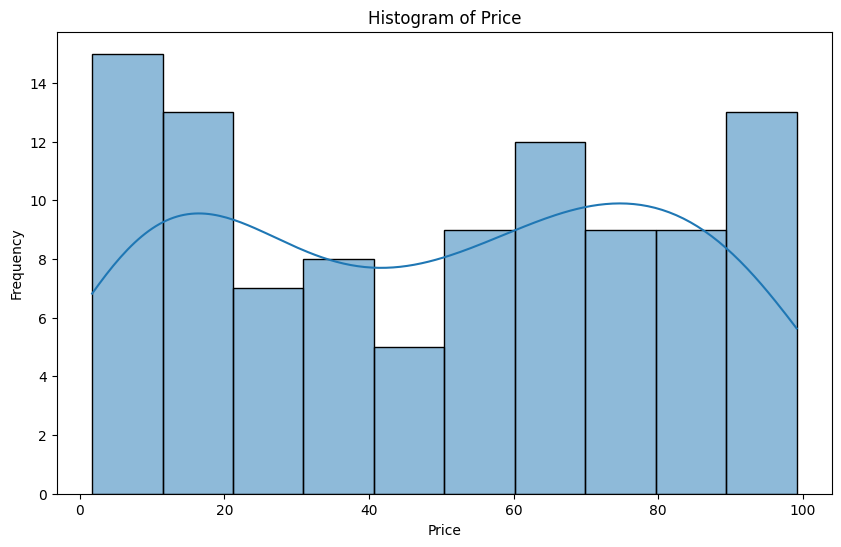

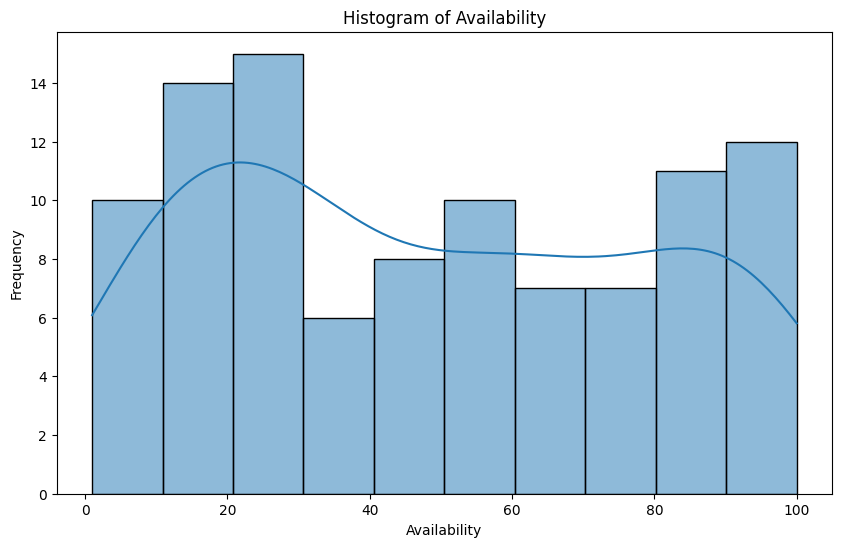

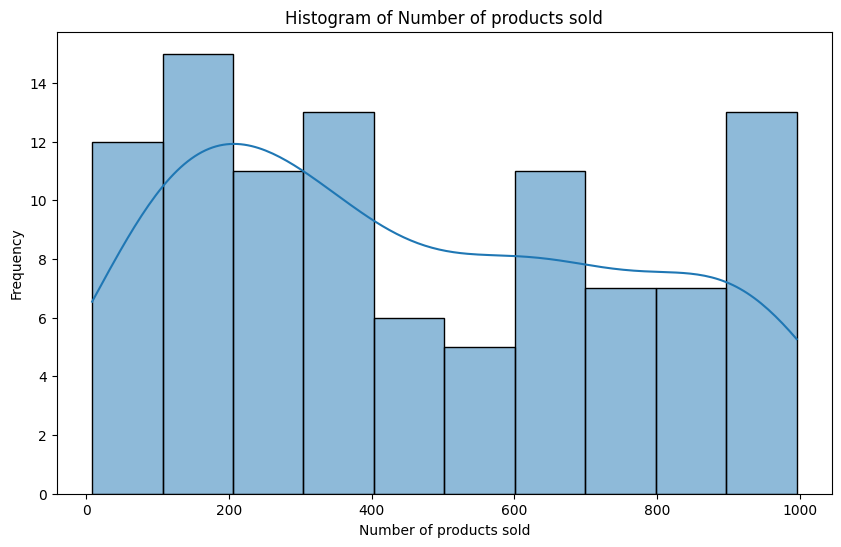

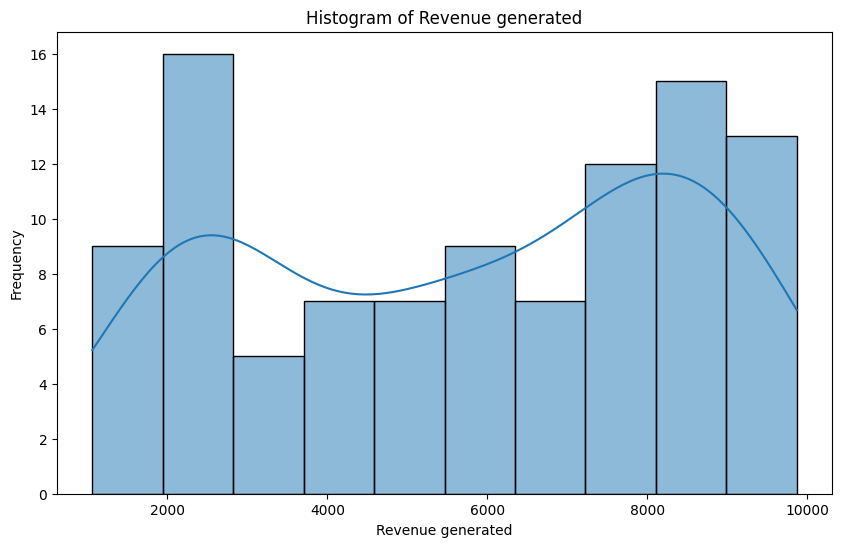

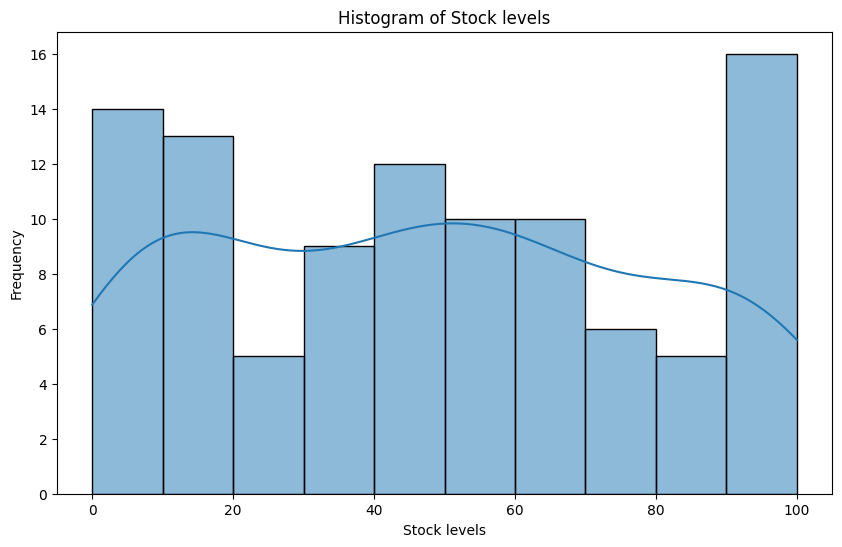

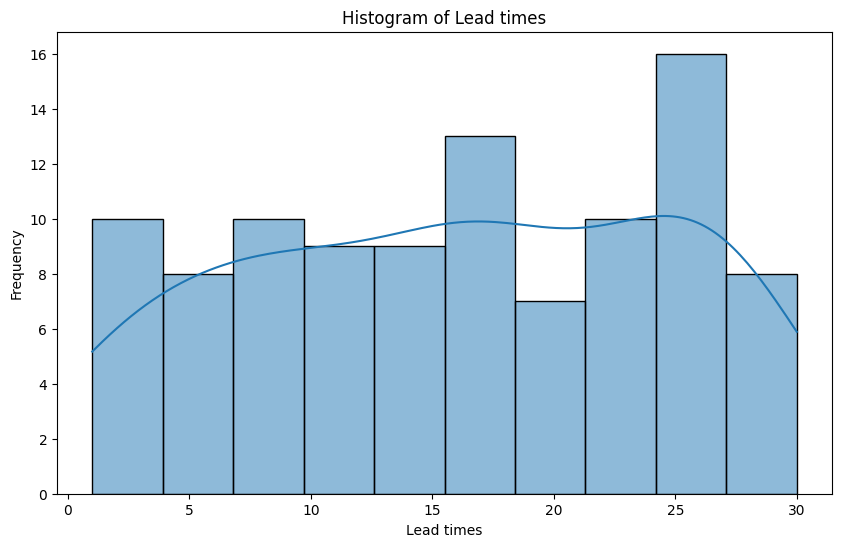

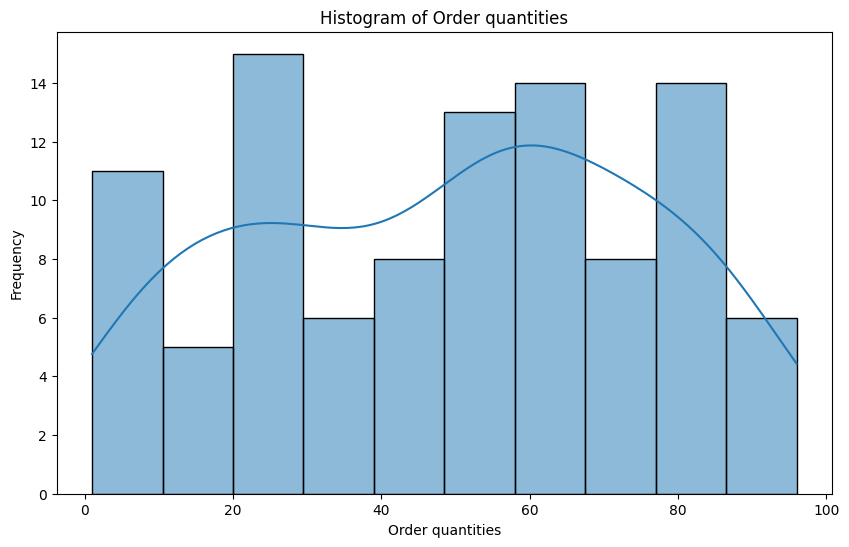

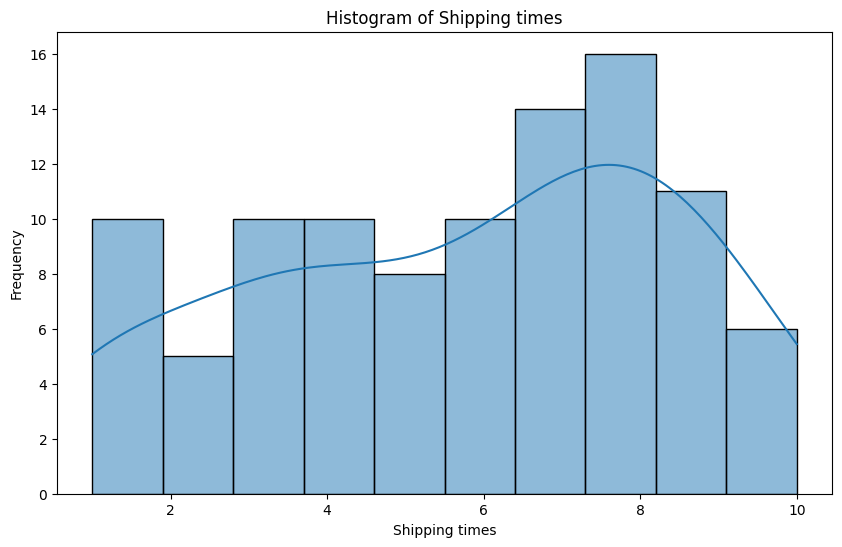

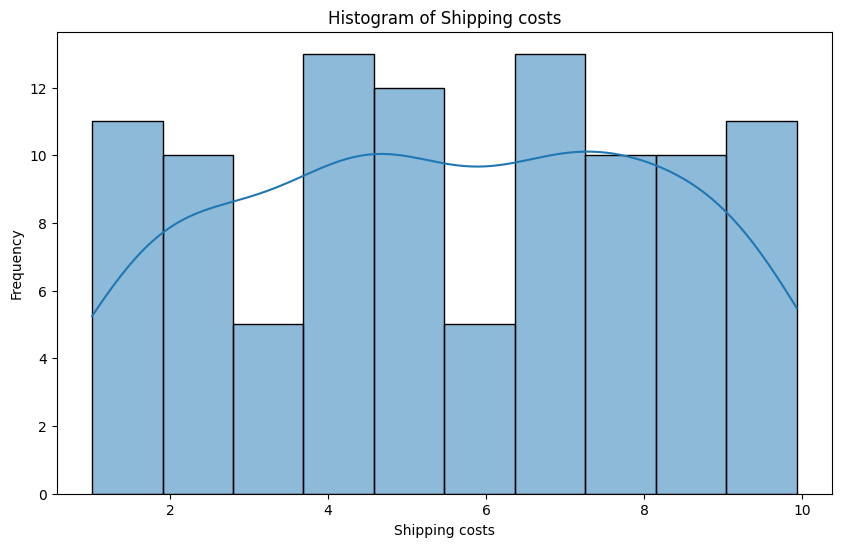

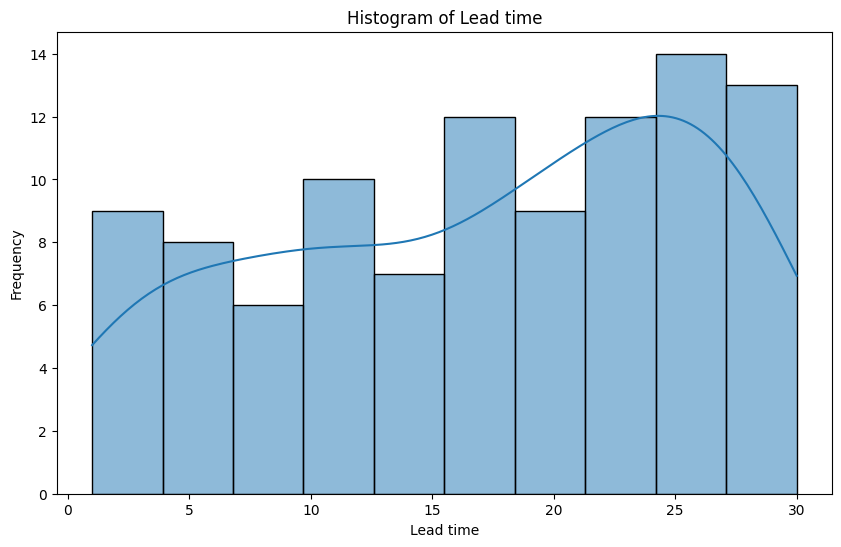

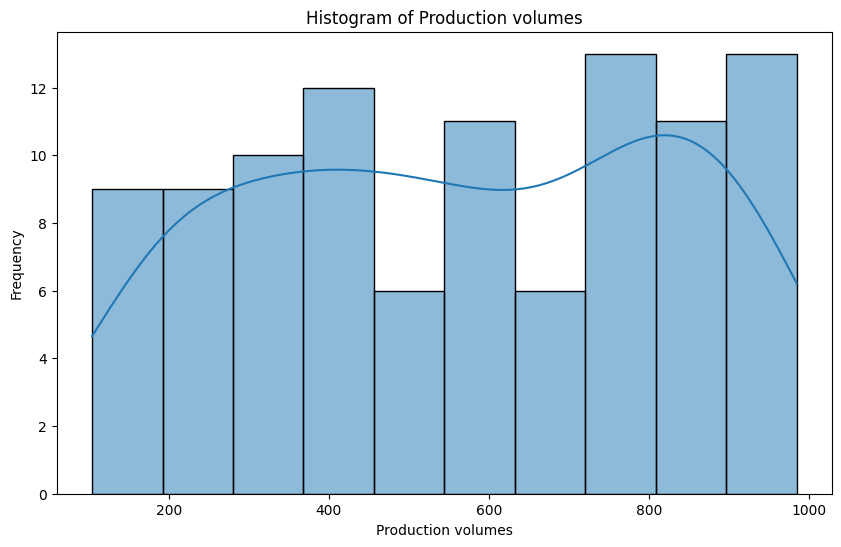

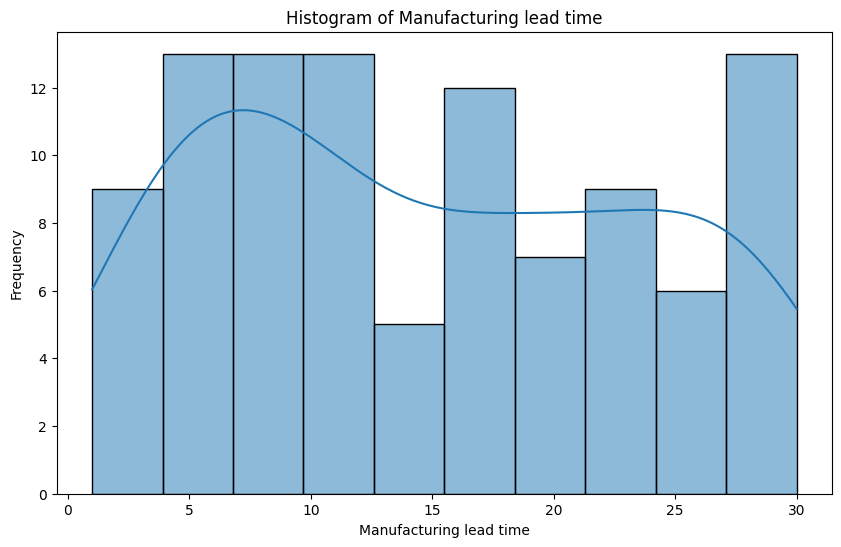

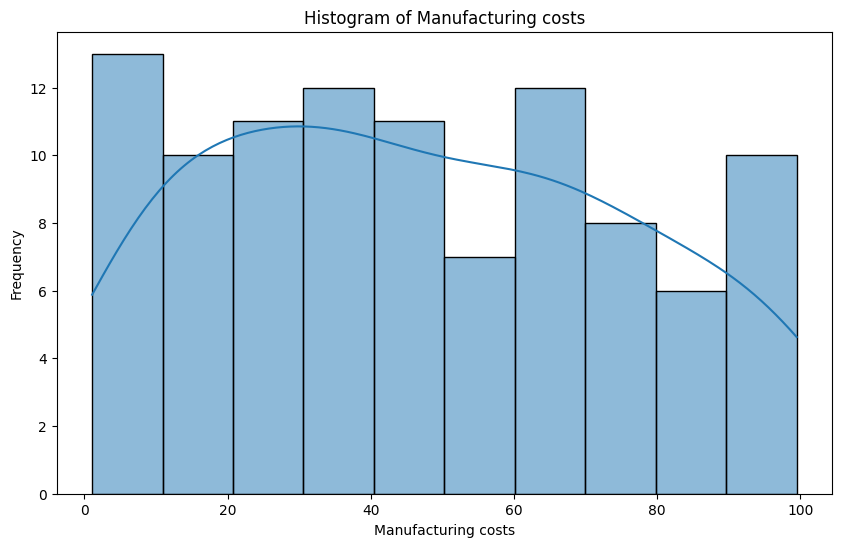

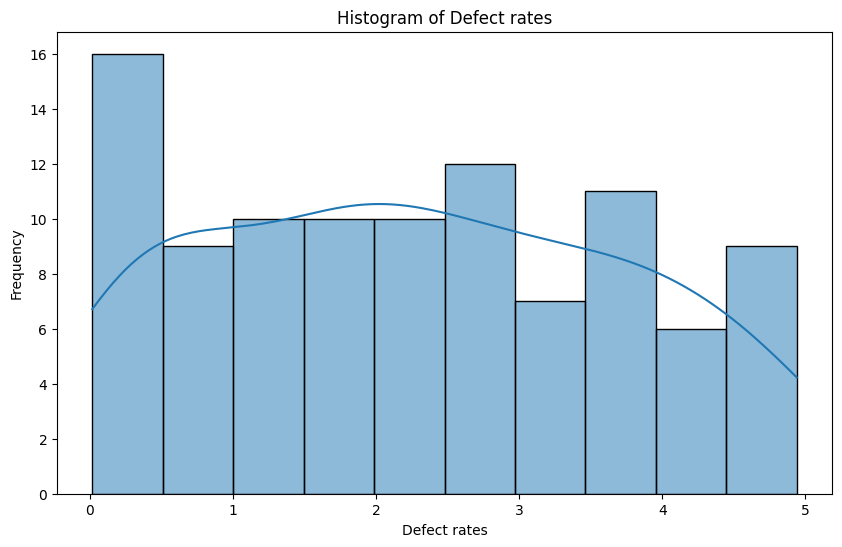

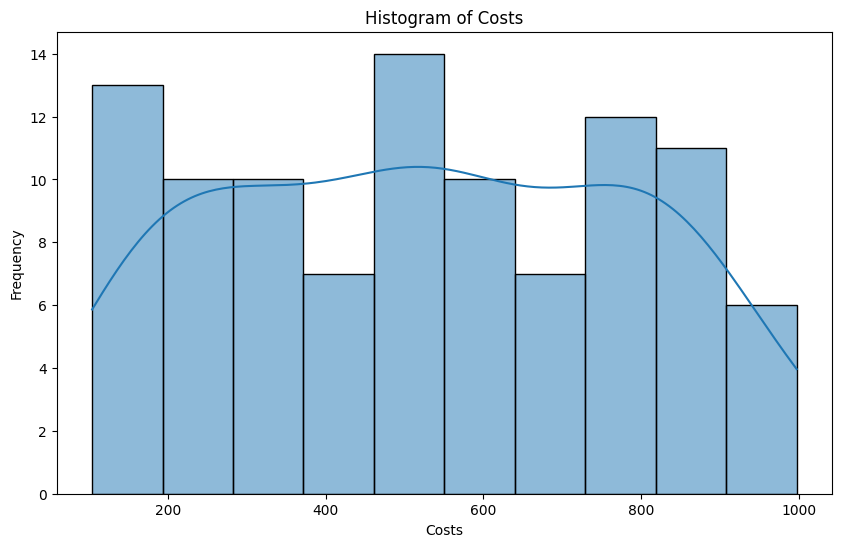

In [ ]:
# Selecting int64 and float columns for undrsatnding distributions
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=10, kde=True)  # Adjust bins and kde as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#Distribution Plots
Distribution plots, also known as probability density function (PDF) plots, show how values in a dataset are spread out. They help us see the shape of the data distribution and identify patterns.

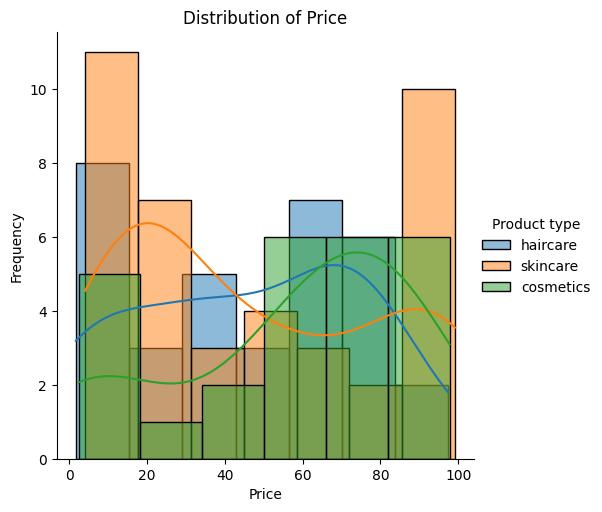

In [ ]:
sns.FacetGrid(data, hue="Product type", height=5).map(sns.histplot, "Price", kde=True).add_legend()
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Among all the product Skincare product Price between 20 to 40 has highest volume.

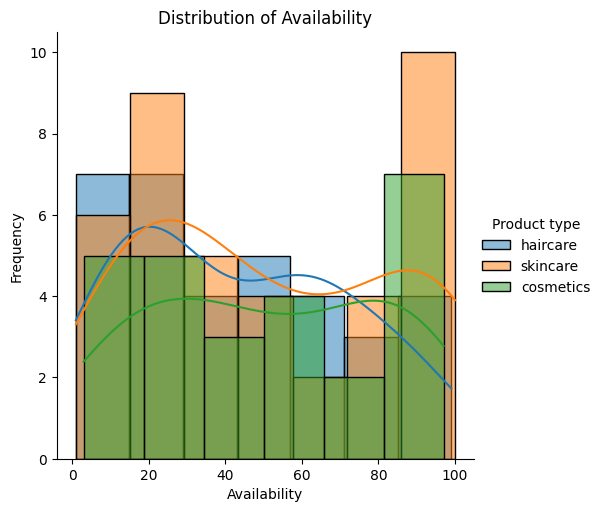

In [ ]:
sns.FacetGrid(data, hue="Product type", height=5).map(sns.histplot, "Availability", kde=True).add_legend()
plt.title('Distribution of Availability')
plt.xlabel('Availability')
plt.ylabel('Frequency')
plt.show()

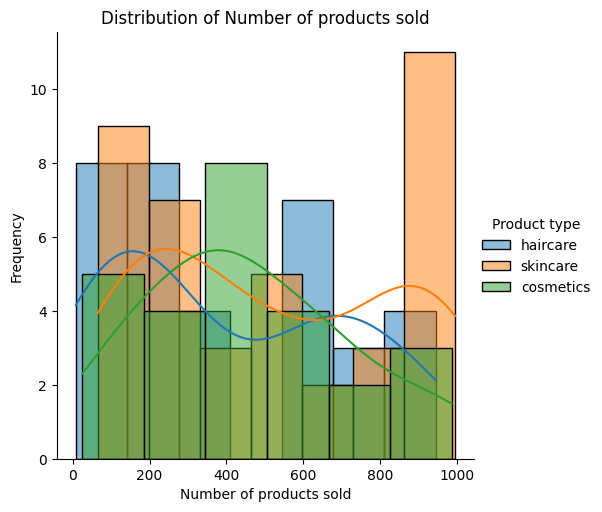

In [ ]:
sns.FacetGrid(data, hue="Product type", height=5).map(sns.histplot, "Number of products sold", kde=True).add_legend()
plt.title('Distribution of Number of products sold')
plt.xlabel('Number of products sold')
plt.ylabel('Frequency')
plt.show()

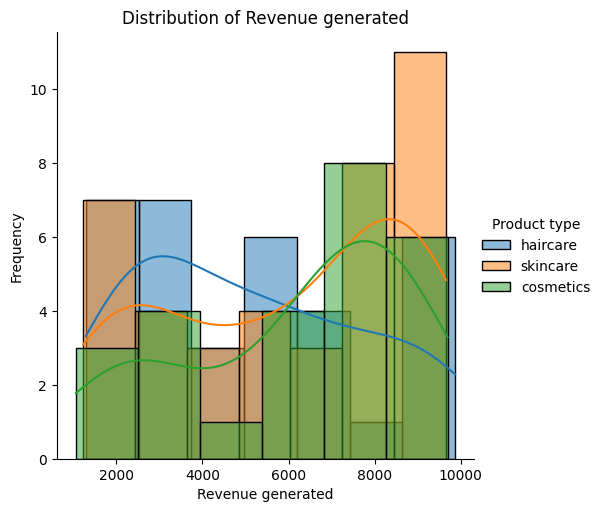

In [ ]:
sns.FacetGrid(data, hue="Product type", height=5).map(sns.histplot, "Revenue generated", kde=True).add_legend()
plt.title('Distribution of Revenue generated')
plt.xlabel('Revenue generated')
plt.ylabel('Frequency')
plt.show()

#Bar Charts

Bar charts display the frequency or count of categories within a single variable, making them useful for comparing different groups.

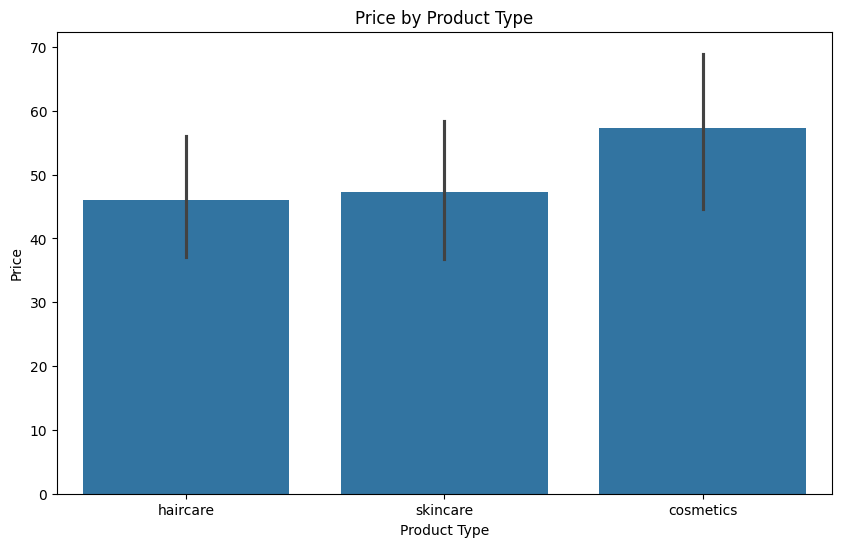

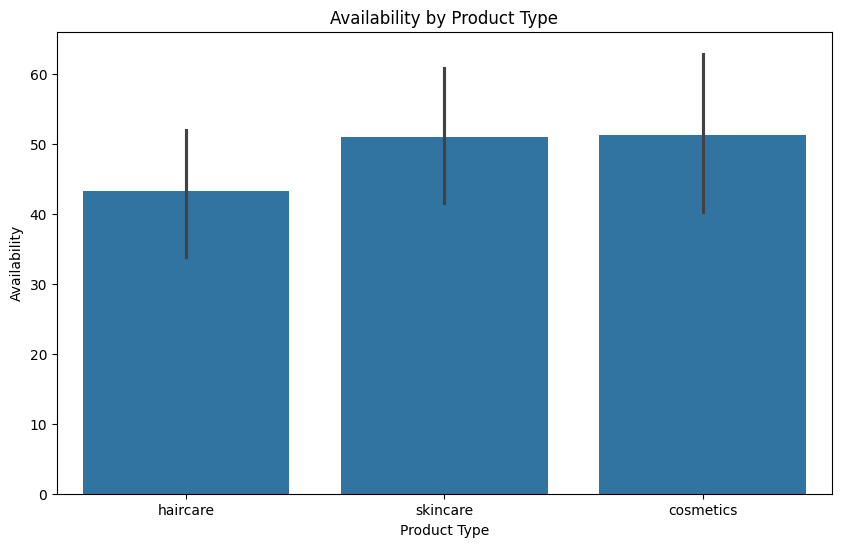

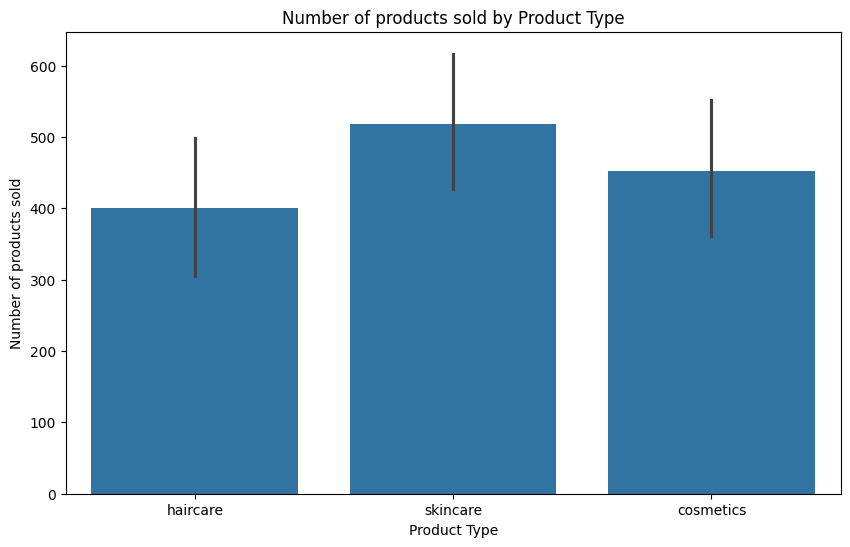

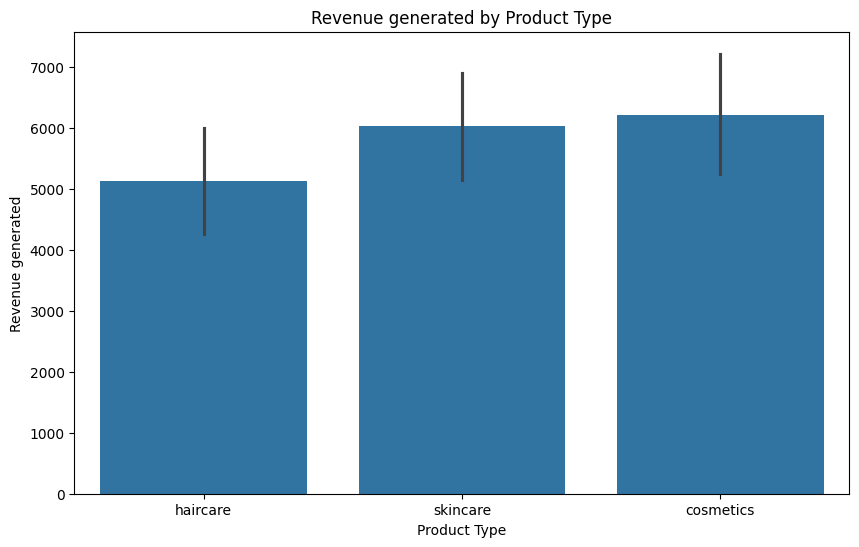

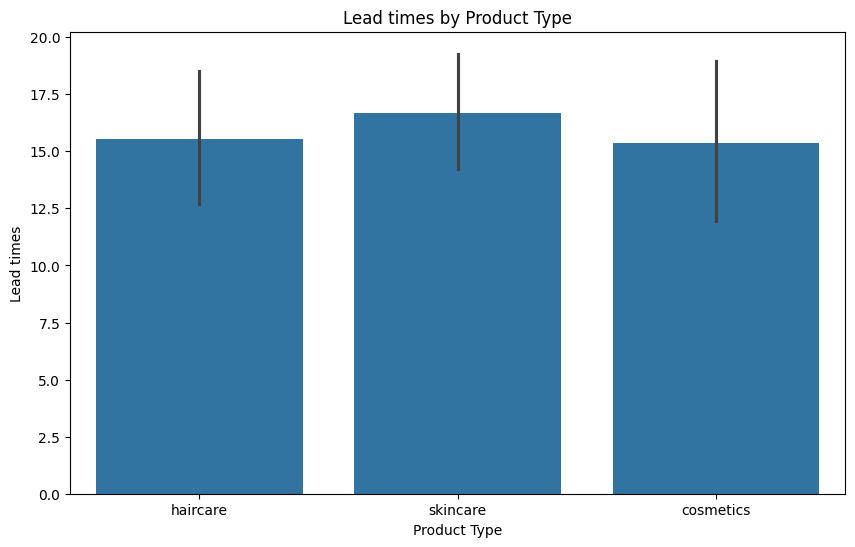

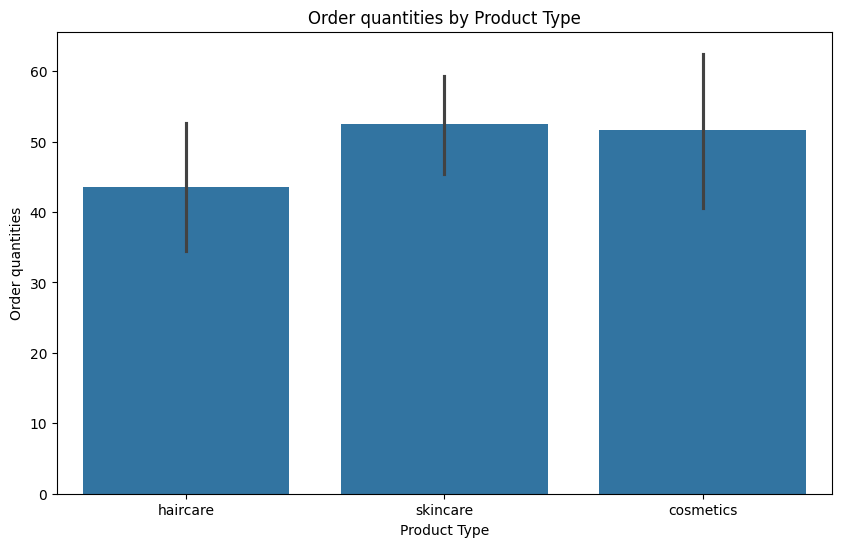

In [ ]:
col =["Price","Availability","Number of products sold","Revenue generated","Lead times","Order quantities"]
# Create bar charts for each selected column against 'Product type'
for column in col:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Product type', y=column, data=data)
    plt.title(f'{column} by Product Type')
    plt.xlabel('Product Type')
    plt.ylabel(column)
    plt.show()

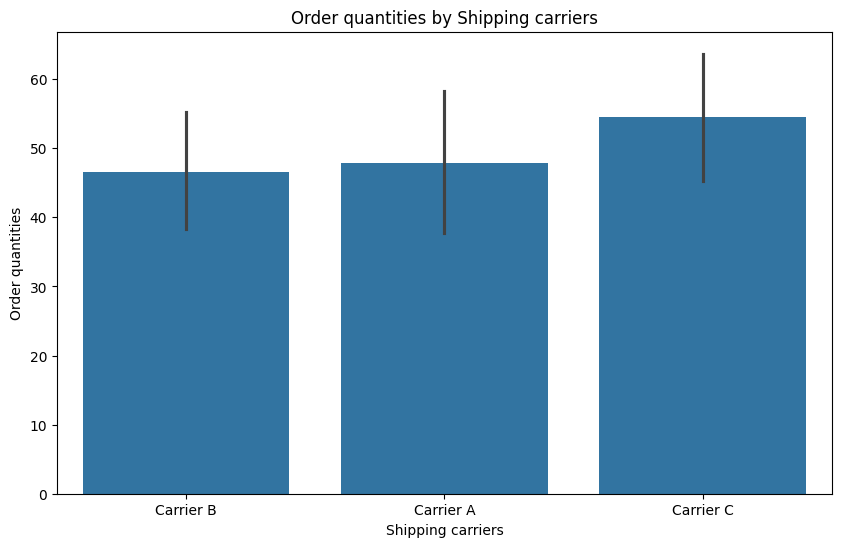

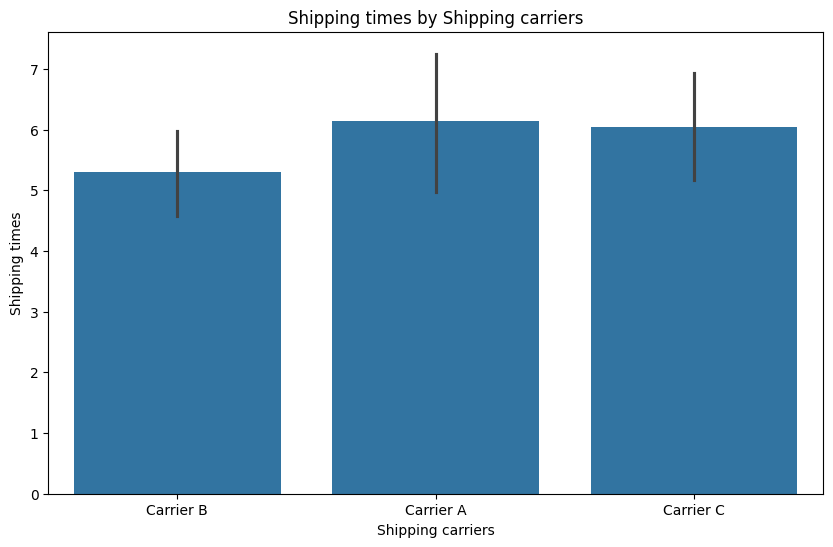

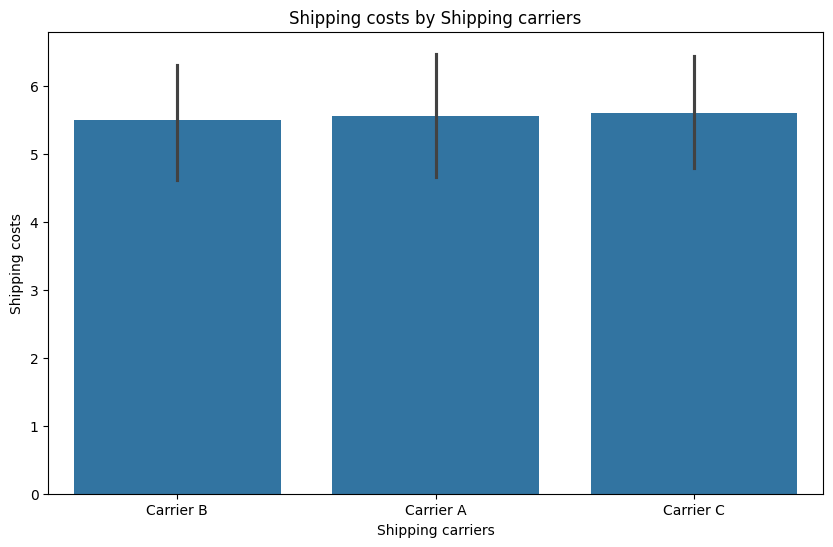

In [ ]:
col =["Order quantities","Shipping times","Shipping costs"]
# Create bar charts for each selected column against 'Shipping carriers'
for column in col:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Shipping carriers', y=column, data=data)
    plt.title(f'{column} by Shipping carriers')
    plt.xlabel('Shipping carriers')
    plt.ylabel(column)
    plt.show()

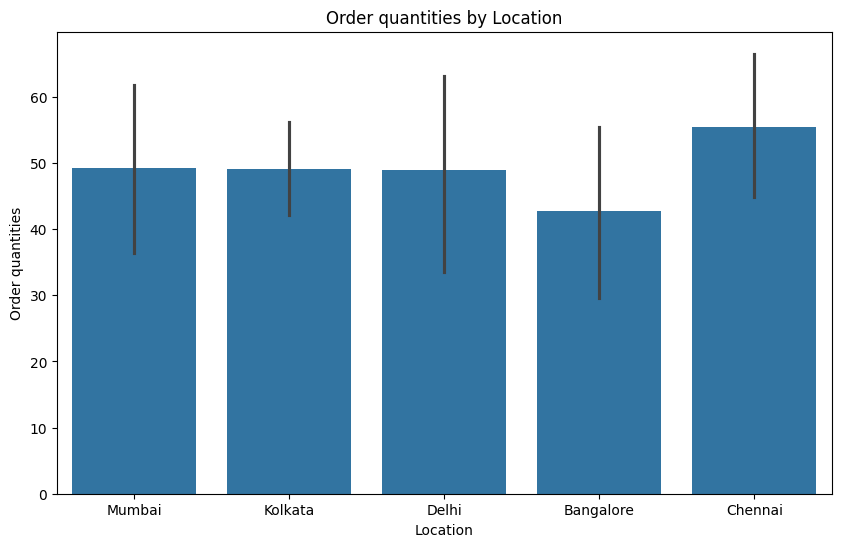

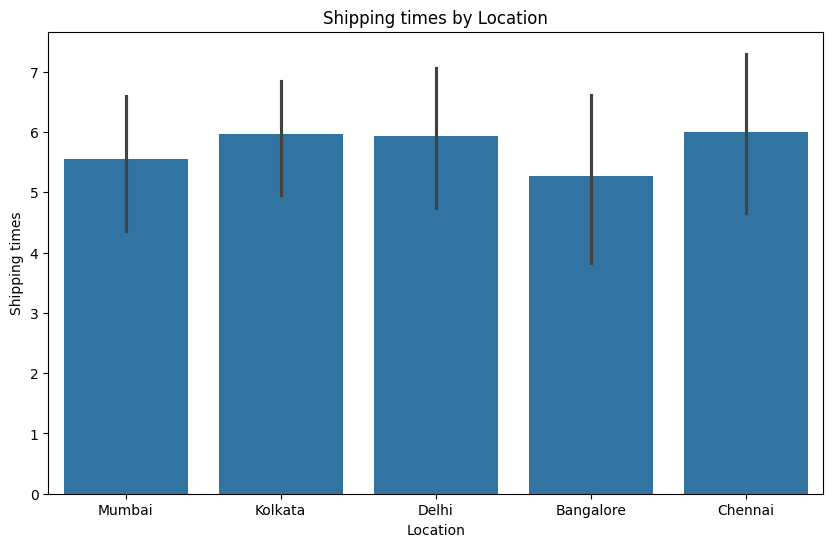

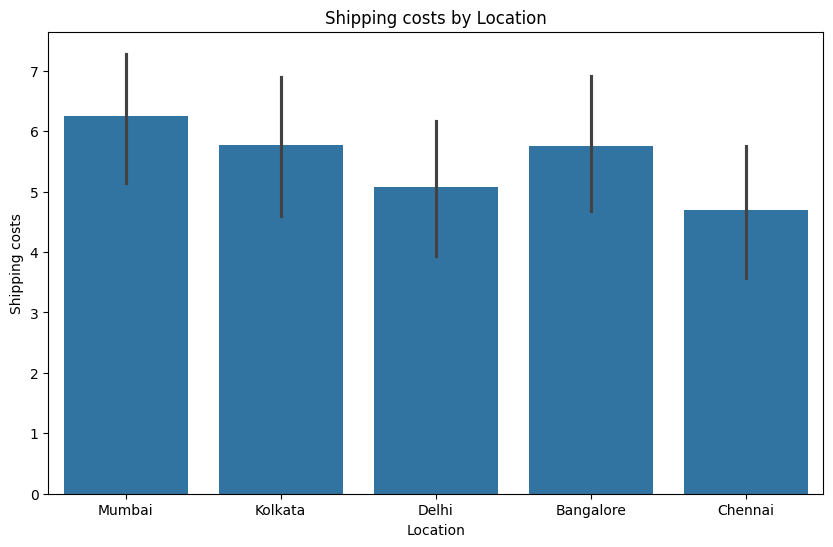

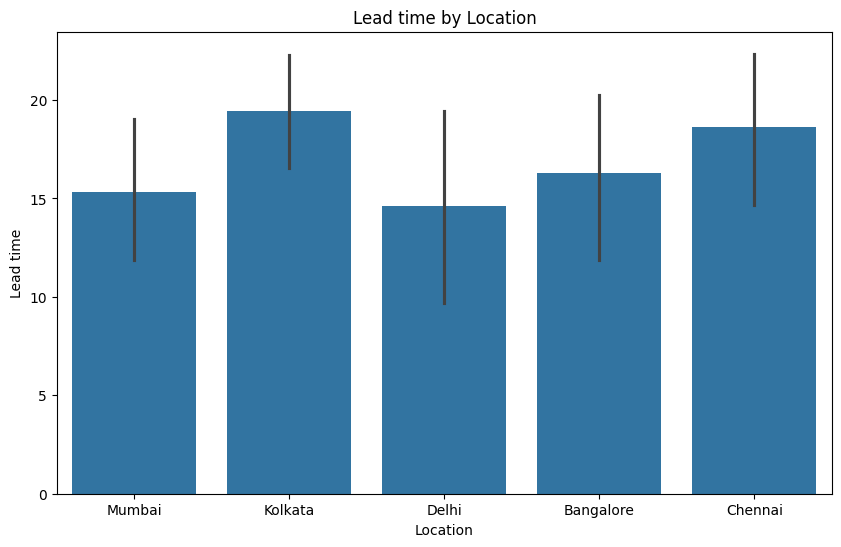

In [ ]:
col =["Order quantities","Shipping times","Shipping costs","Lead time"]
# Create bar charts for each selected column against 'Location'
for column in col:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Location', y=column, data=data)
    plt.title(f'{column} by Location')
    plt.xlabel('Location')
    plt.ylabel(column)
    plt.show()

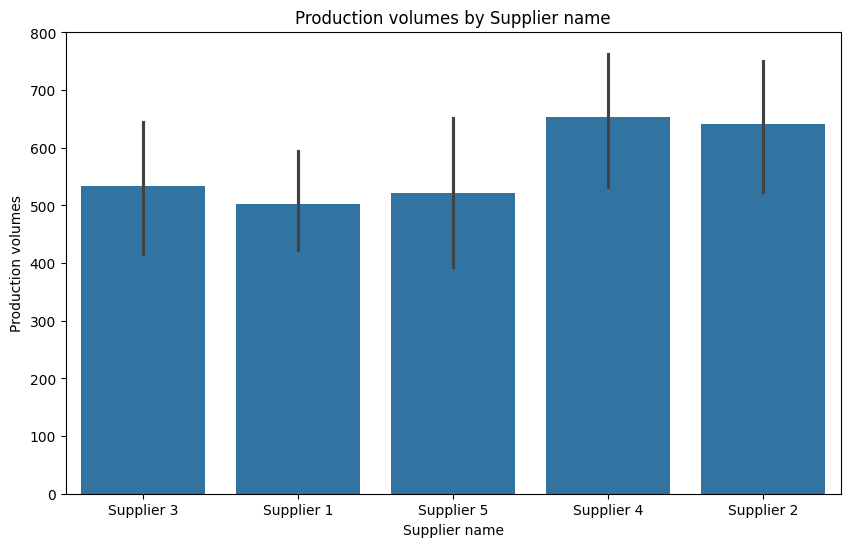

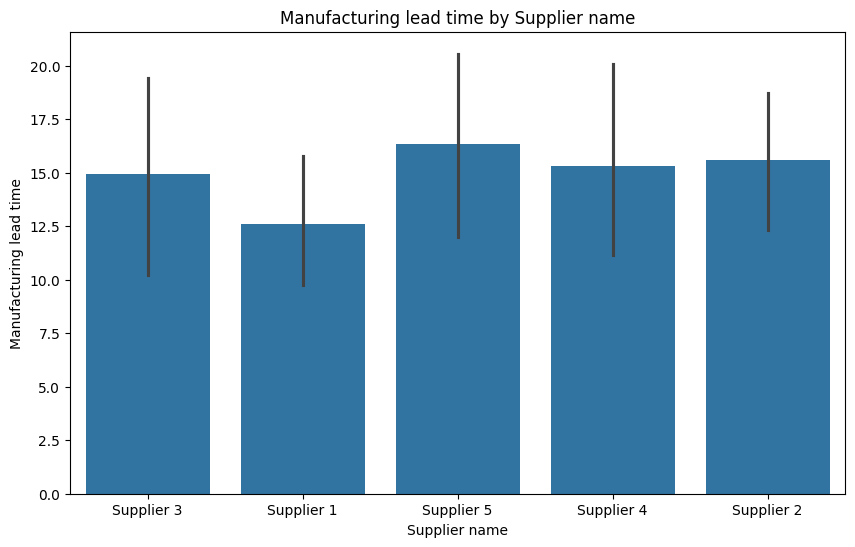

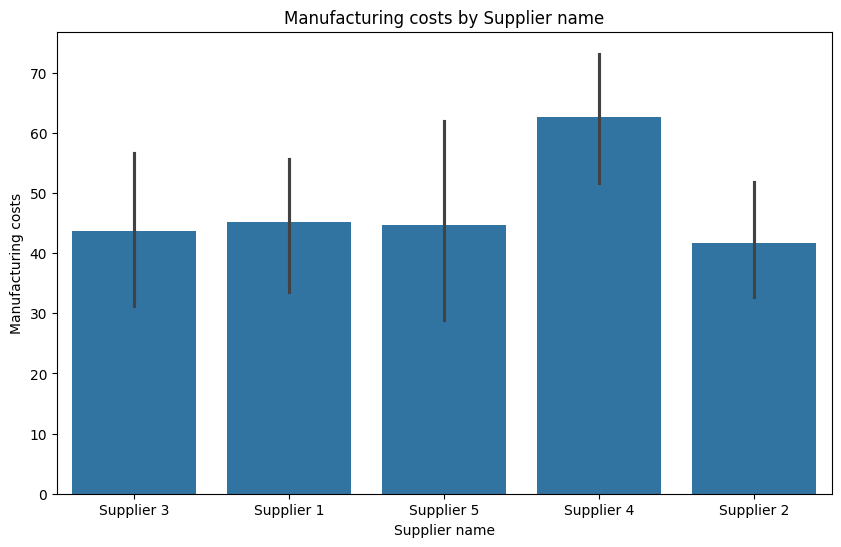

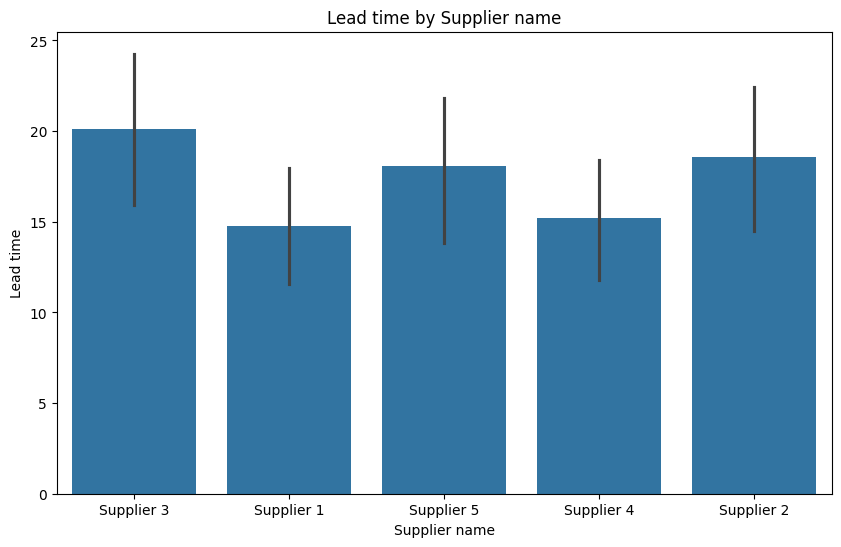

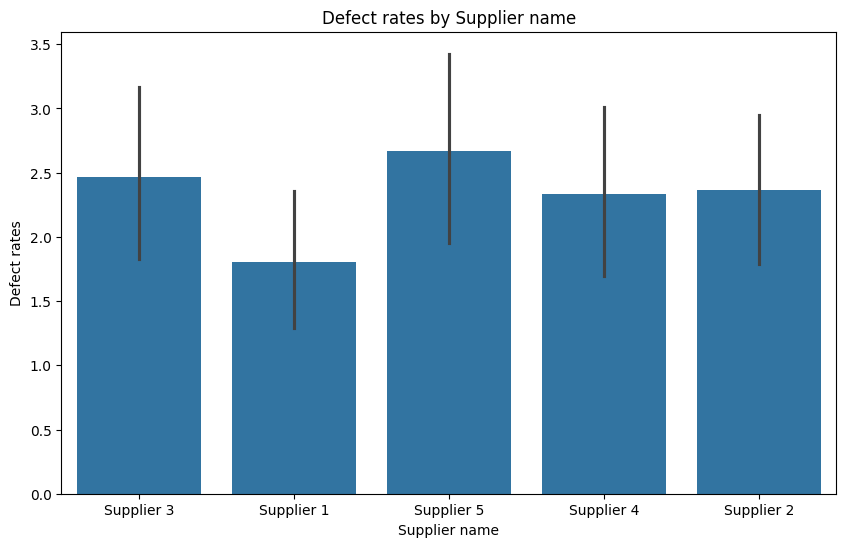

In [ ]:
col =["Production volumes","Manufacturing lead time","Manufacturing costs","Lead time","Defect rates"]
# Create bar charts for each selected column against 'Supplier name'
for column in col:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Supplier name', y=column, data=data)
    plt.title(f'{column} by Supplier name')
    plt.xlabel('Supplier name')
    plt.ylabel(column)
    plt.show()

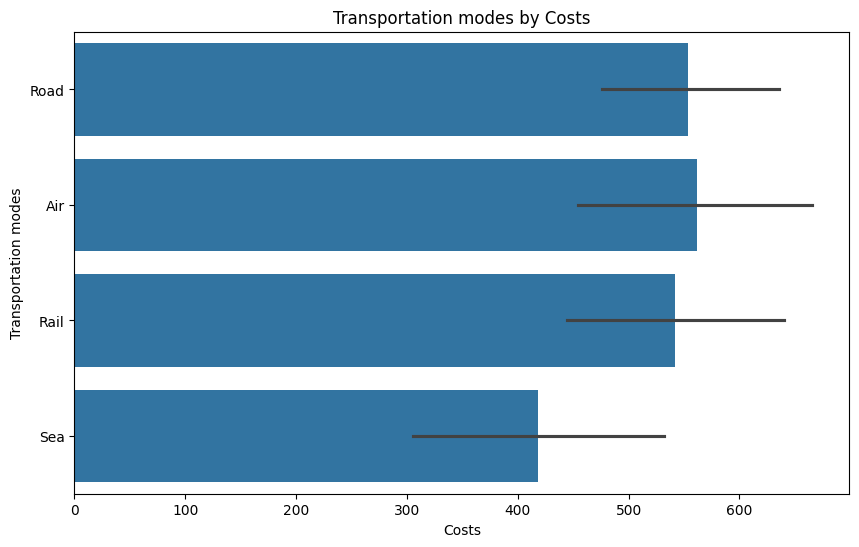

In [ ]:
col =["Transportation modes"]
# Create bar charts for each selected column against 'costs'
for column in col:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Costs', y=column, data=data)
    plt.title(f'{column} by Costs')
    plt.xlabel('Costs')
    plt.ylabel(column)
    plt.show()

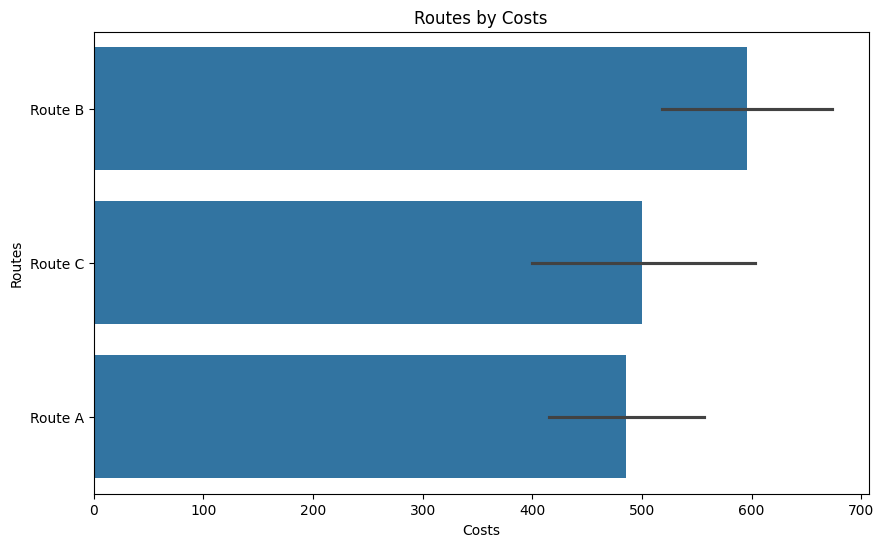

In [ ]:
col =["Routes"]
# Create bar charts for each selected column against 'Costs'
for column in col:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Costs', y=column, data=data)
    plt.title(f'{column} by Costs')
    plt.xlabel('Costs')
    plt.ylabel(column)
    plt.show()

Box Plots

Box plots, also known as box-and-whisker plots, summarize data using five key metrics: minimum, lower quartile (25th percentile), median (50th percentile), upper quartile (75th percentile), and maximum. They also highlight outliers.

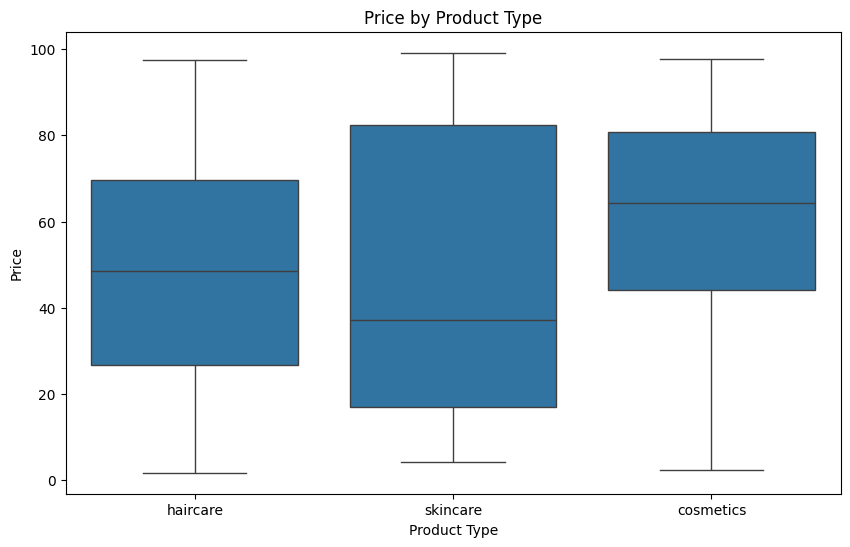

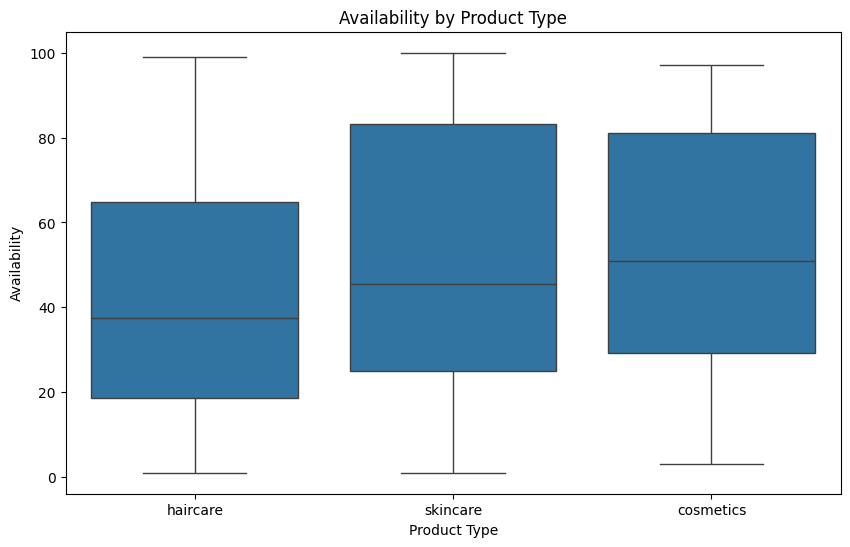

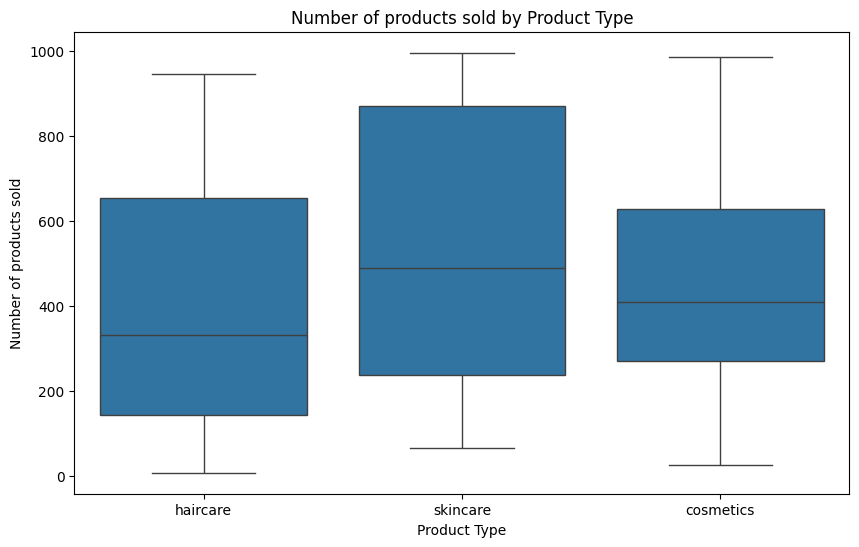

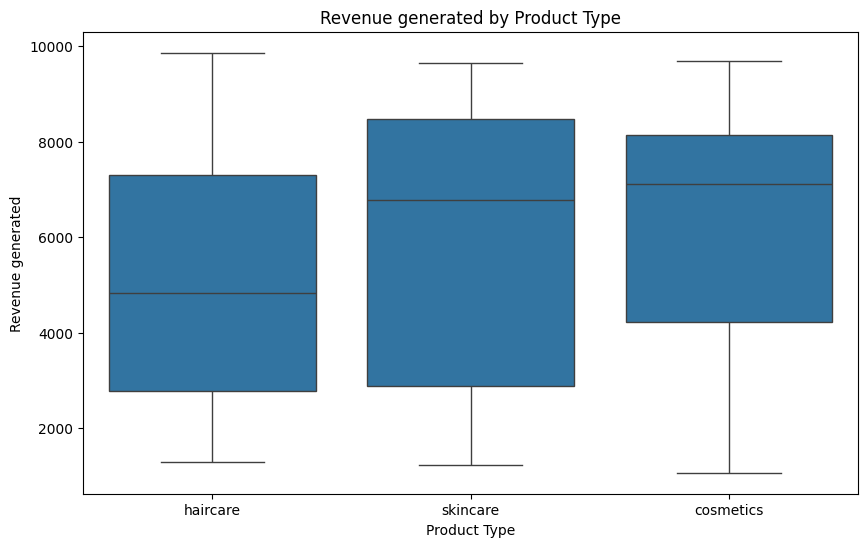

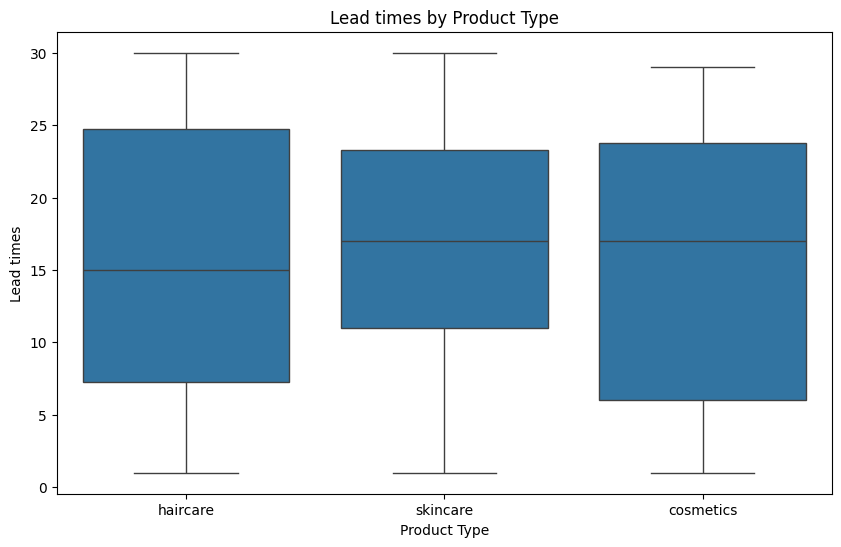

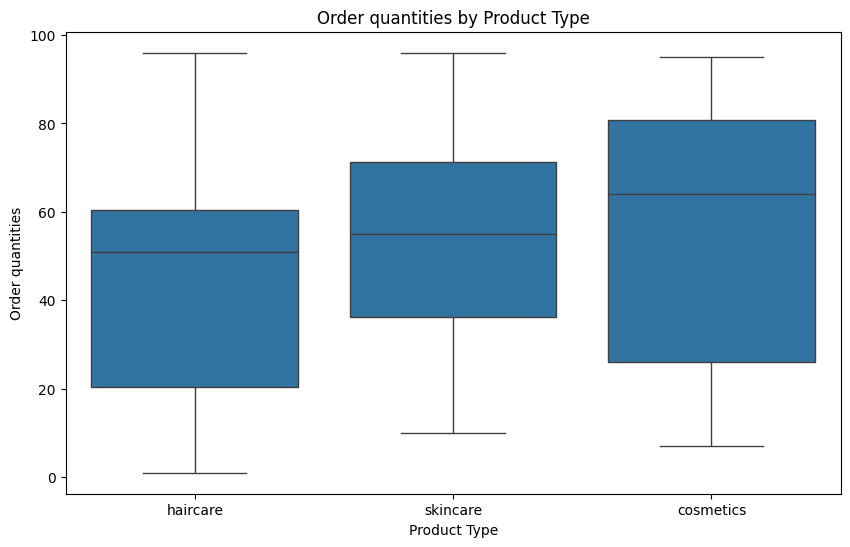

In [ ]:
col =["Price","Availability","Number of products sold","Revenue generated","Lead times","Order quantities"]
# Create bar charts for each selected column against 'Product type'
for column in col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Product type', y=column, data=data)
    plt.title(f'{column} by Product Type')
    plt.xlabel('Product Type')
    plt.ylabel(column)
    plt.show()

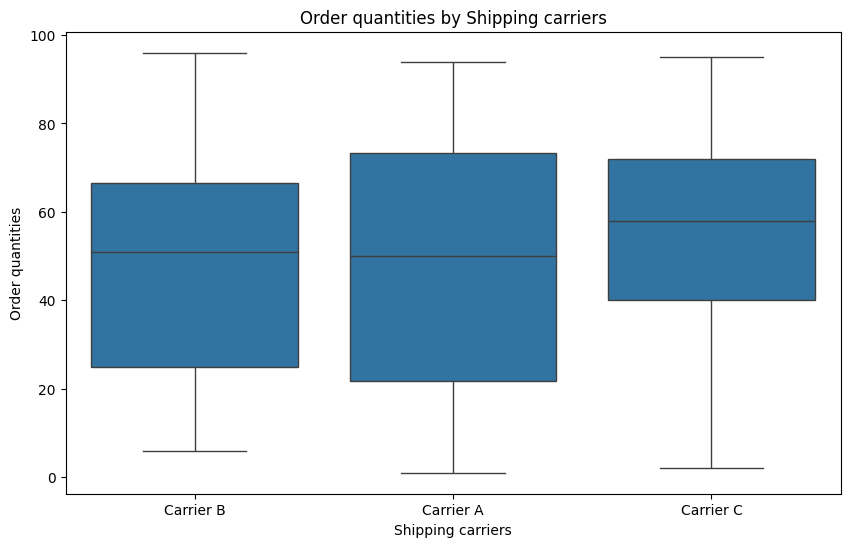

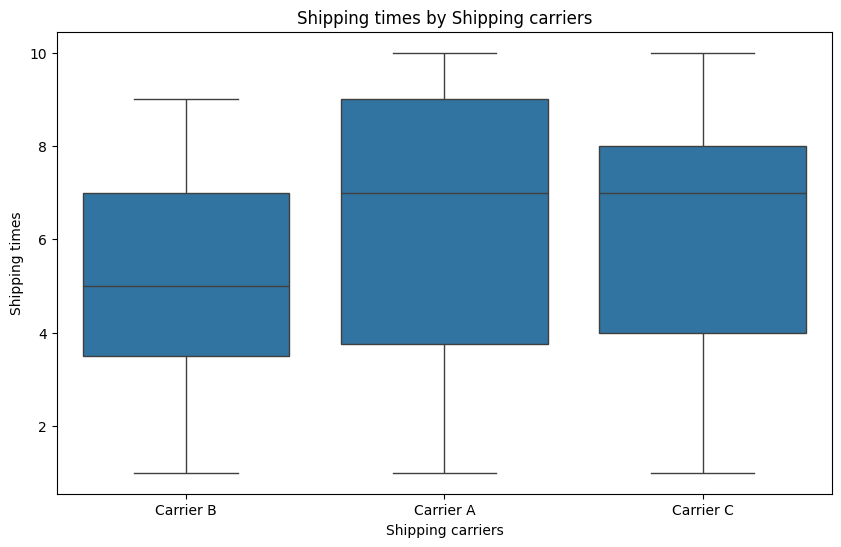

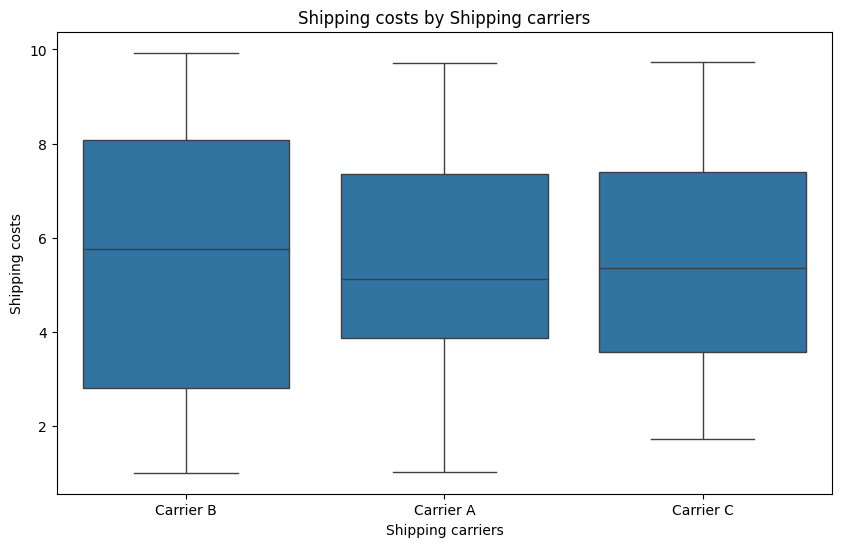

In [ ]:
col =["Order quantities","Shipping times","Shipping costs"]
# Create bar charts for each selected column against 'Shipping carriers'
for column in col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Shipping carriers', y=column, data=data)
    plt.title(f'{column} by Shipping carriers')
    plt.xlabel('Shipping carriers')
    plt.ylabel(column)
    plt.show()

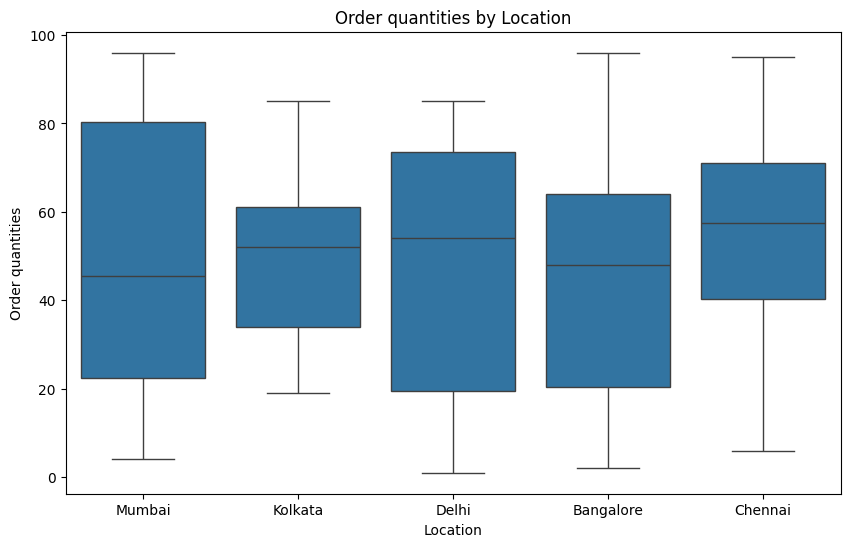

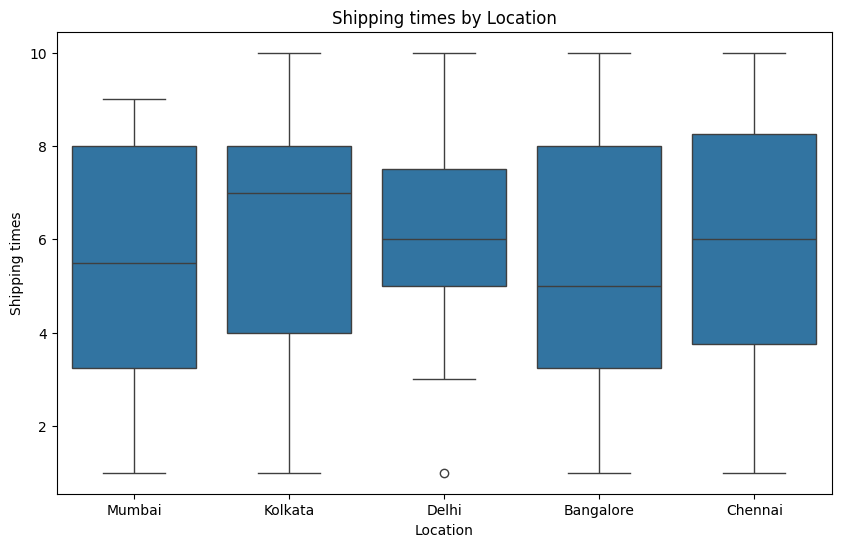

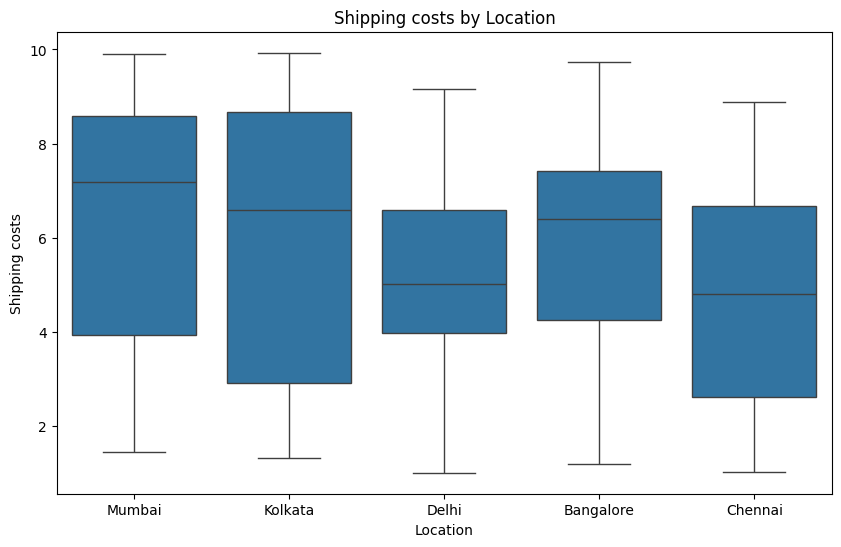

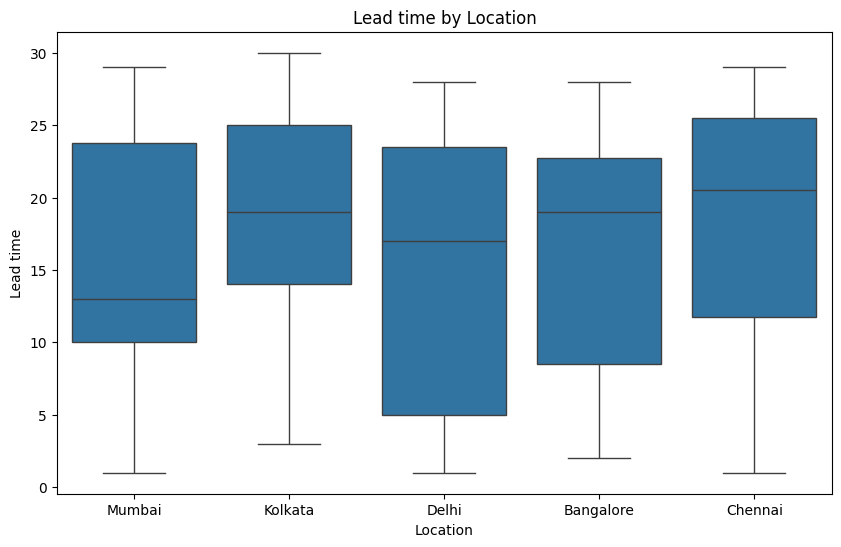

In [ ]:
col =["Order quantities","Shipping times","Shipping costs","Lead time"]
# Create bar charts for each selected column against 'Location'
for column in col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Location', y=column, data=data)
    plt.title(f'{column} by Location')
    plt.xlabel('Location')
    plt.ylabel(column)
    plt.show()

  #Shipping times and Shipping times by location in delhi location a potentail outlier were found to address.

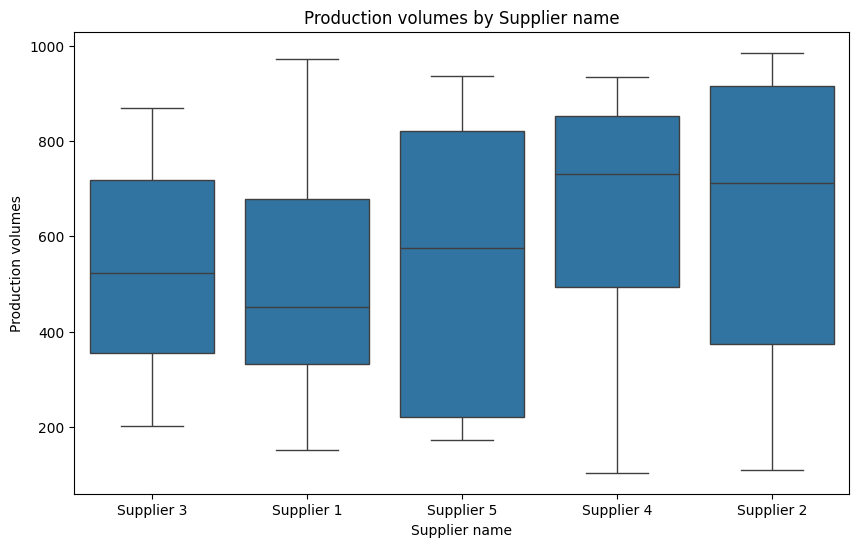

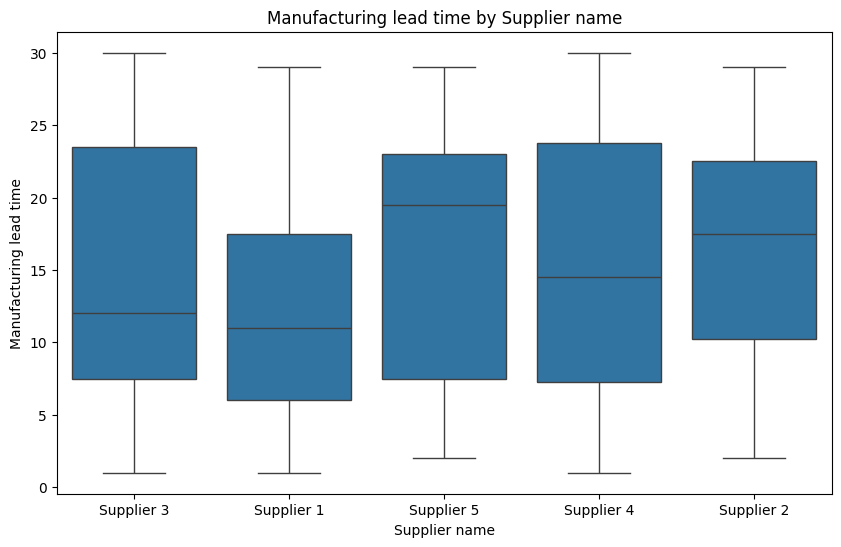

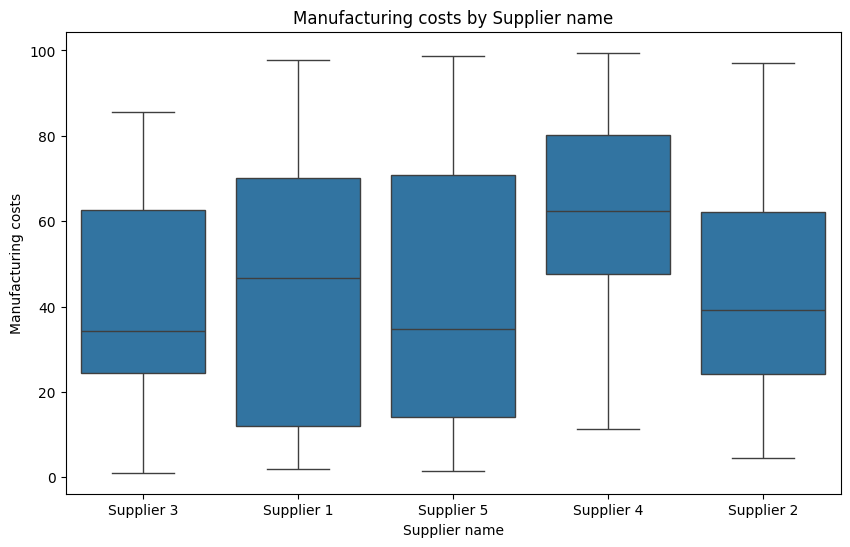

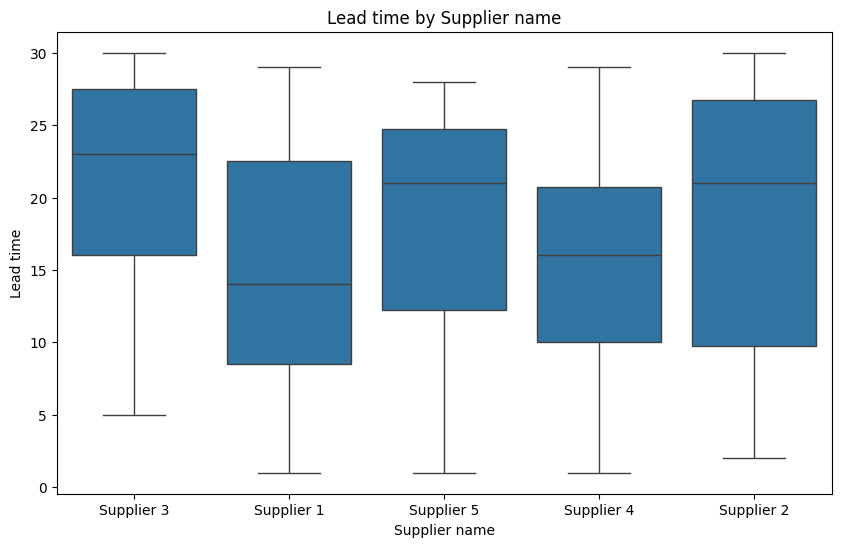

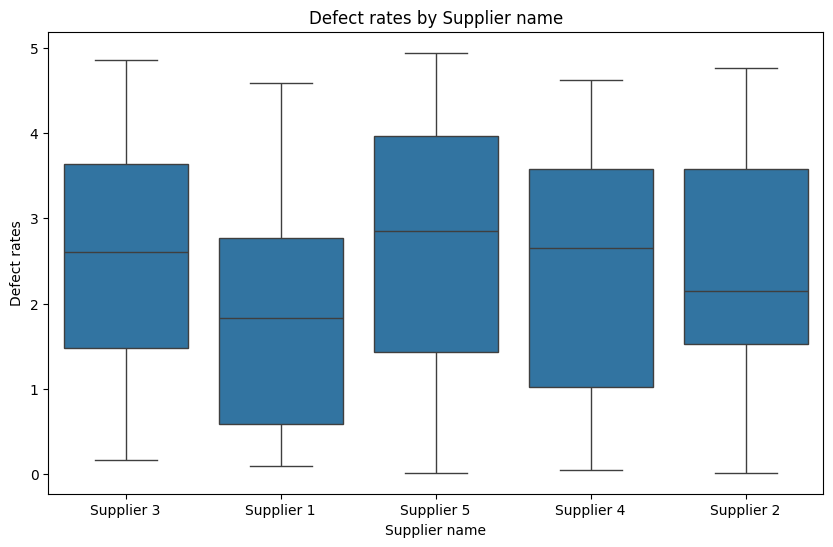

In [ ]:
col =["Production volumes","Manufacturing lead time","Manufacturing costs","Lead time","Defect rates"]
# Create bar charts for each selected column against 'Supplier name'
for column in col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Supplier name', y=column, data=data)
    plt.title(f'{column} by Supplier name')
    plt.xlabel('Supplier name')
    plt.ylabel(column)
    plt.show()

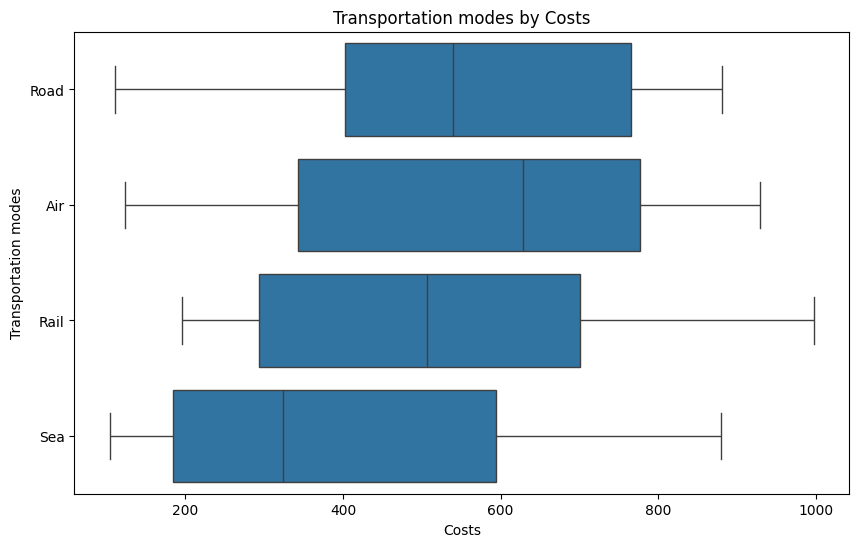

In [ ]:
col =["Transportation modes"]
# Create bar charts for each selected column against 'costs'
for column in col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Costs', y=column, data=data)
    plt.title(f'{column} by Costs')
    plt.xlabel('Costs')
    plt.ylabel(column)
    plt.show()

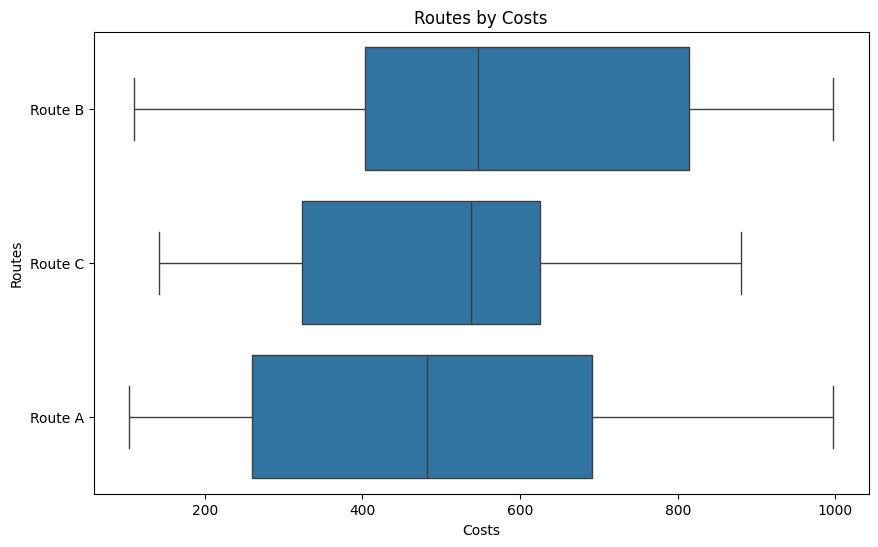

In [ ]:
col =["Routes"]
# Create bar charts for each selected column against 'Costs'
for column in col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Costs', y=column, data=data)
    plt.title(f'{column} by Costs')
    plt.xlabel('Costs')
    plt.ylabel(column)
    plt.show()

#Violin plots

Violin plots combine the features of box plots and density plots. They provide a visual summary of the data and show the distribution’s shape, density, and variability.


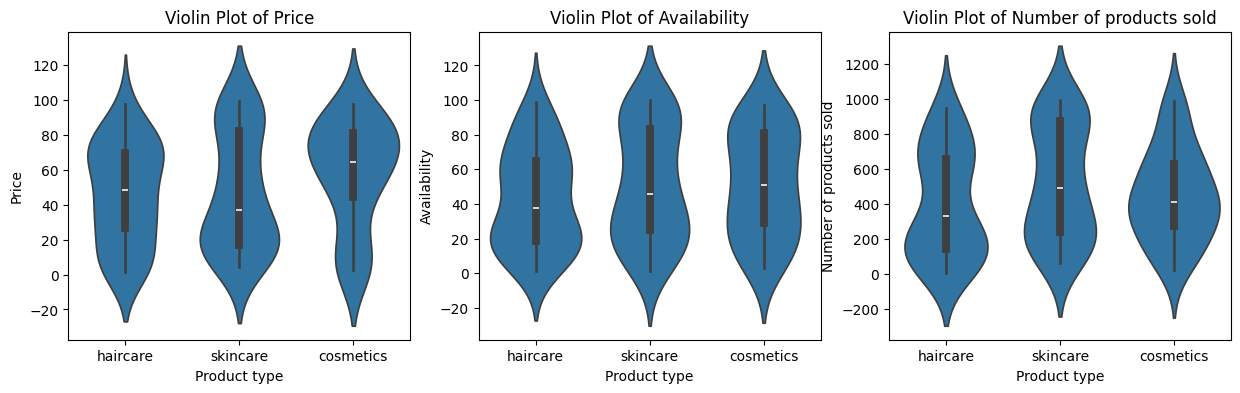

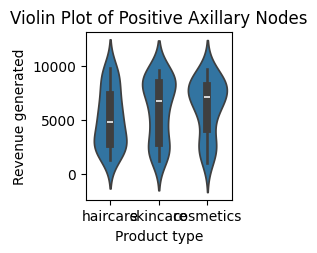

In [ ]:

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.violinplot(x='Product type', y='Price', data=data)
plt.title('Violin Plot of Price')
plt.subplot(1, 3, 2)
sns.violinplot(x='Product type', y='Availability', data=data)
plt.title('Violin Plot of Availability')
plt.subplot(1, 3, 3)
sns.violinplot(x='Product type', y='Number of products sold', data=data)
plt.title('Violin Plot of Number of products sold')
plt.show()
plt.subplot(2, 3, 1)
sns.violinplot(x='Product type', y='Revenue generated', data=data)
plt.title('Violin Plot of Positive Axillary Nodes')
plt.show()

In [ ]:
correlation = data['Price'].corr(data['Revenue generated'])
print(correlation)


0.03842440295887284


#Bi-variate Data Analysis

Bi-variate data analysis involves studying the relationship between two variables at a time. This helps in understanding how one variable affects another and can reveal underlying patterns or correlations. Here are some common methods for bi-variate analysis.

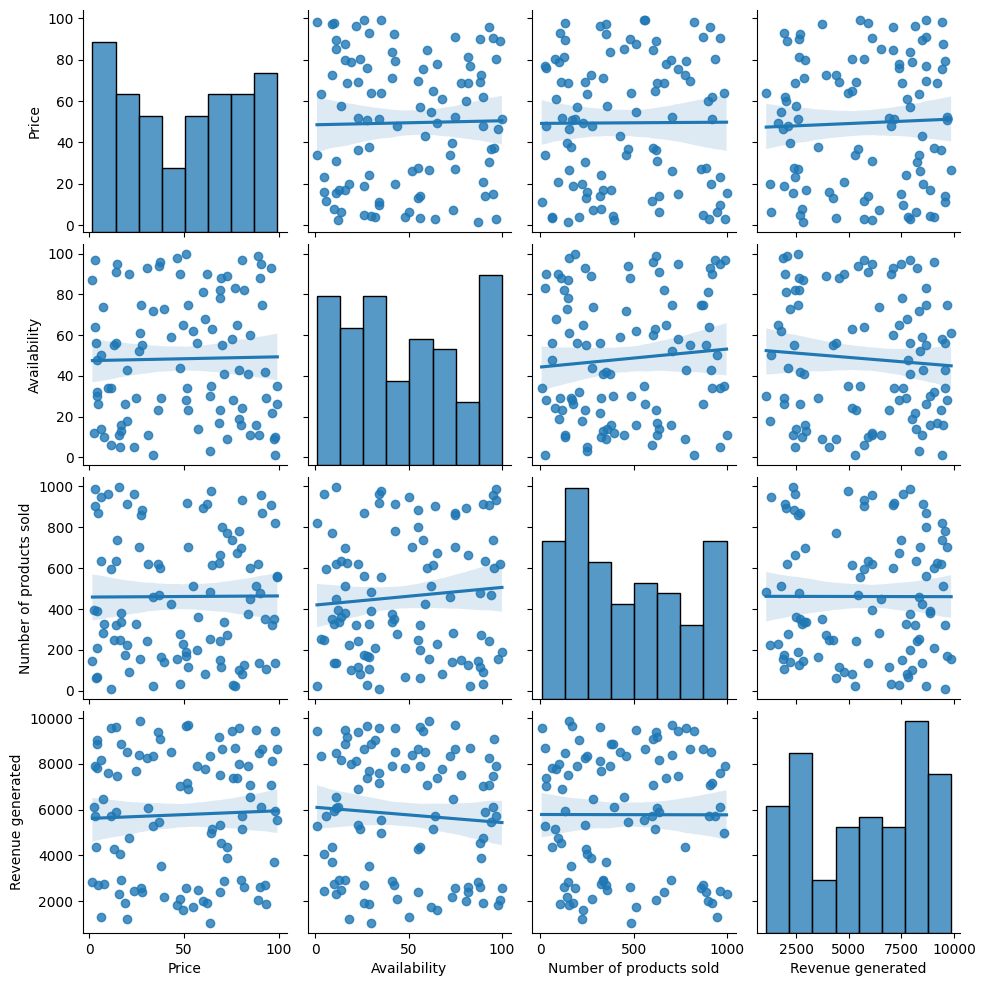

In [ ]:
# Assuming 'data' is your DataFrame
sns.pairplot(data, vars=['Price', 'Availability', 'Number of products sold', 'Revenue generated'],kind="reg")# kind can be change for analysis
plt.show()


Conclusion:
- I can See Zero Co-realationship between the data points
- Price between 0-20 is high in distribution
- Most availablity volume in between 80-100
- No of product sold 100-200 more frquency
- Revenu generated in the range between 8000-9000

## Pair Plot
A pair plot visualizes the pairwise relationships between variables in a dataset. It displays both the distributions of individual variables and their relationships.


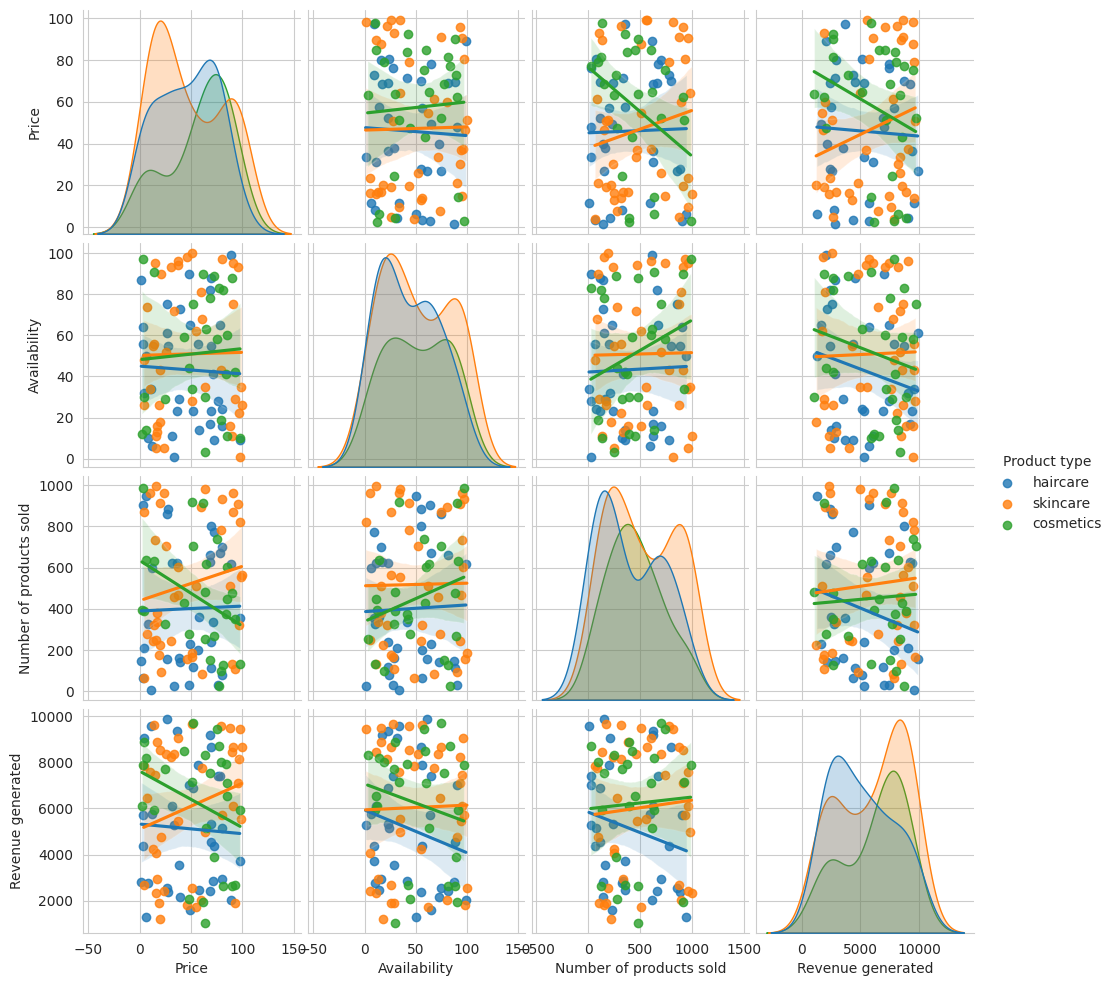

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(data, vars=['Price', 'Availability', 'Number of products sold', 'Revenue generated'], hue='Product type',kind="reg")
plt.show()

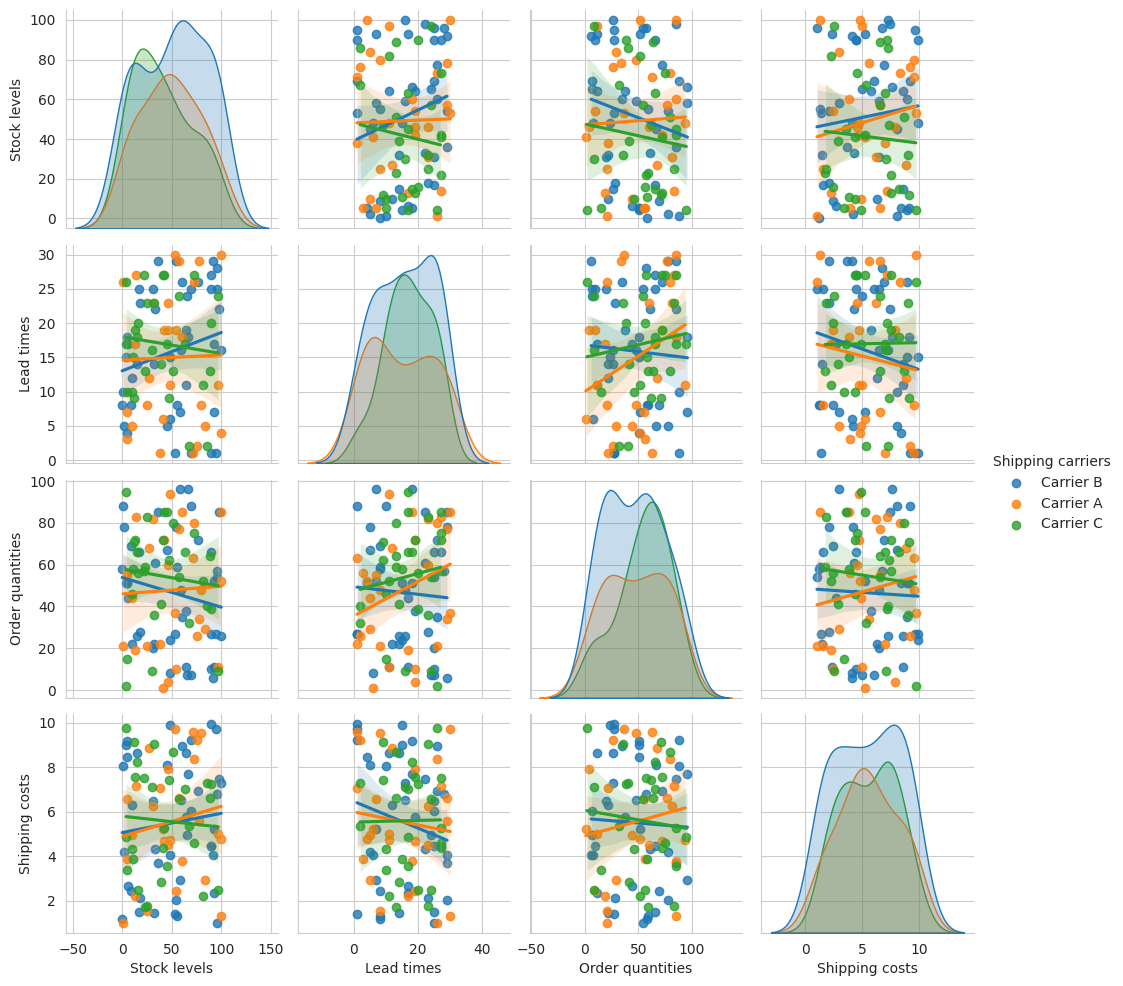

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(data, vars=['Stock levels', 'Lead times','Order quantities','Shipping costs'], hue='Shipping carriers',kind="reg")
plt.show()

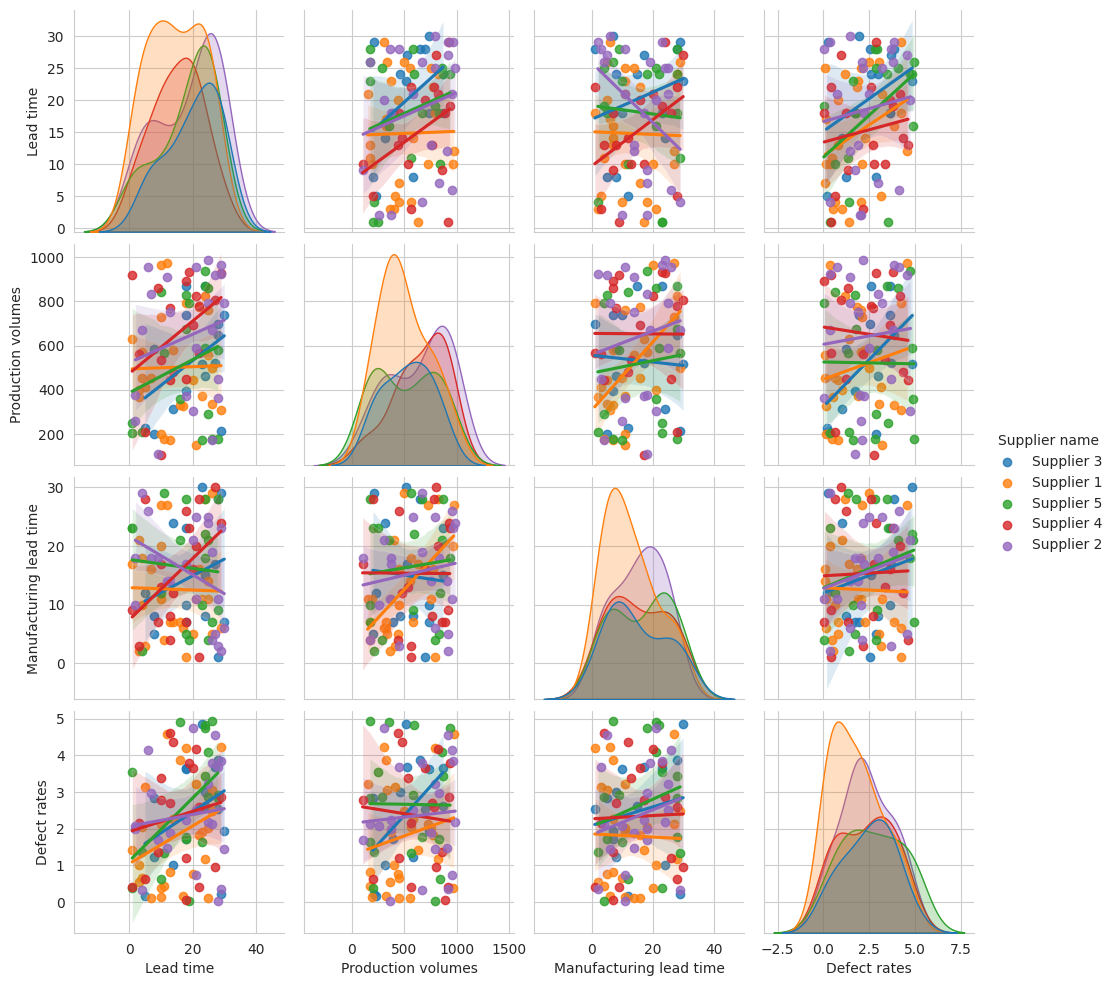

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(data, vars=['Lead time', 'Production volumes','Manufacturing lead time','Defect rates'], hue='Supplier name',kind="reg")
plt.show()

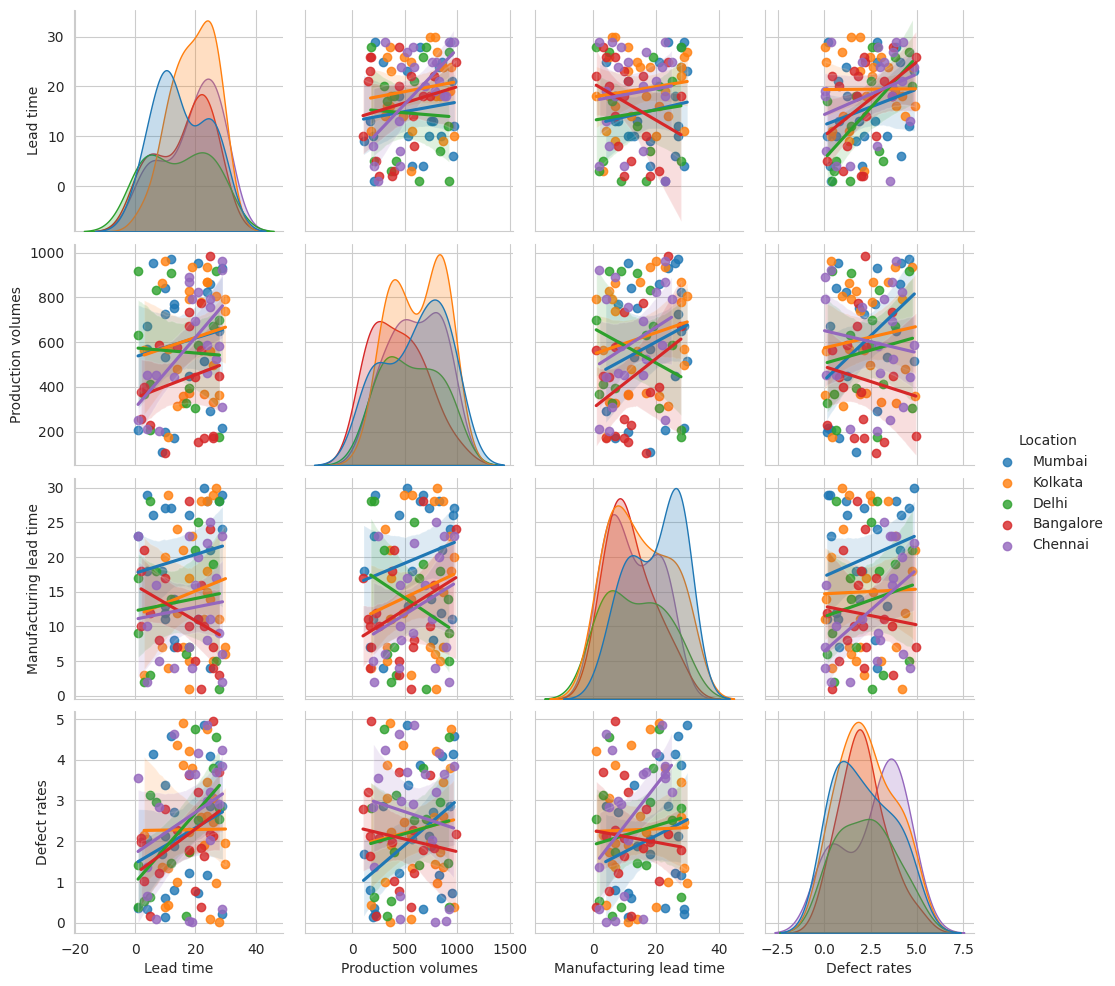

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(data, vars=['Lead time', 'Production volumes','Manufacturing lead time','Defect rates'], hue='Location',kind="reg")
plt.show()

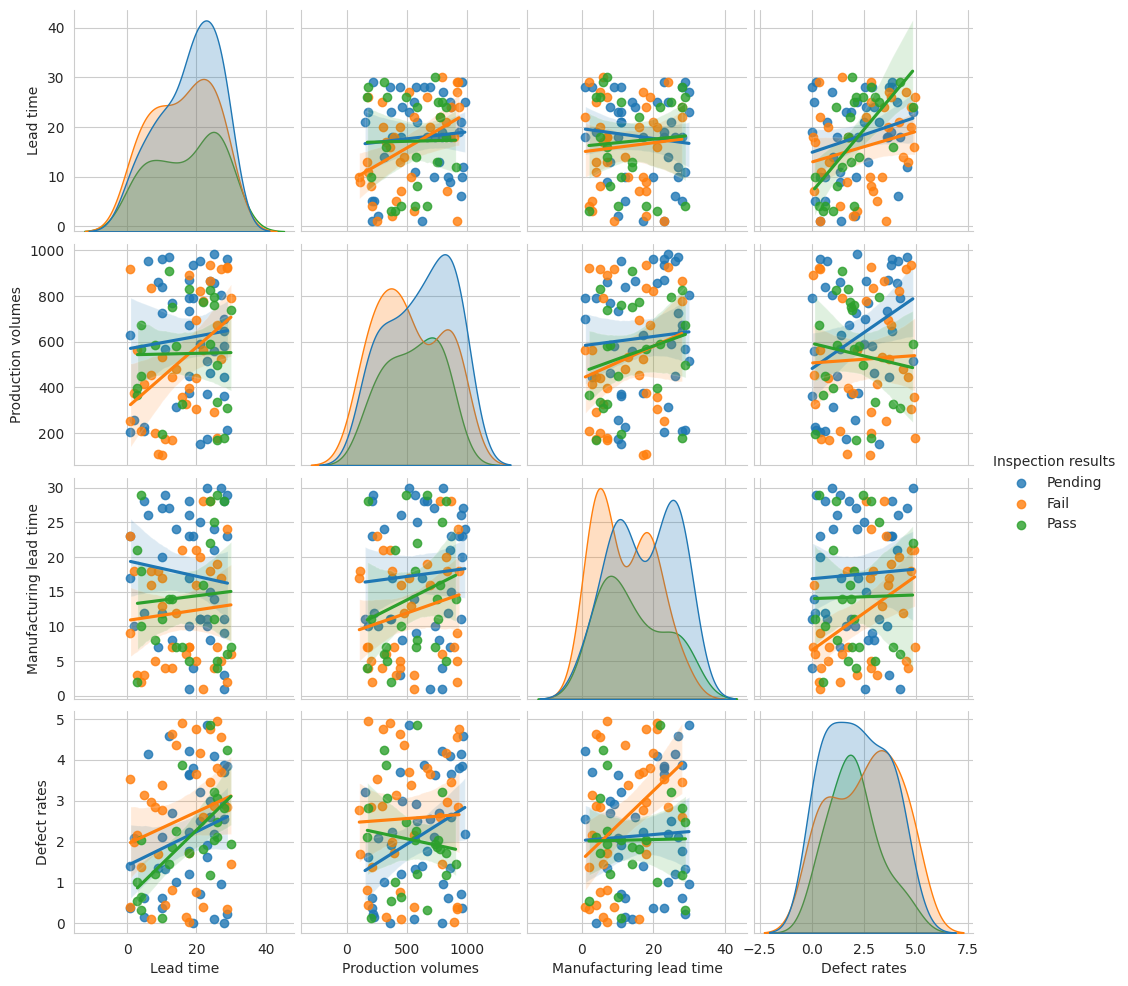

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(data, vars=['Lead time', 'Production volumes','Manufacturing lead time','Defect rates'], hue='Inspection results',kind="reg")
plt.show()

#Joint Plot

A joint plot provides a detailed view of the relationship between two variables along with their individual distributions.

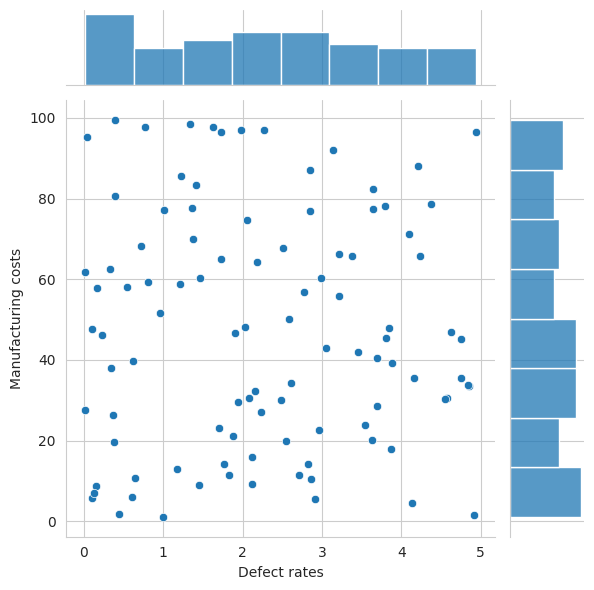

In [ ]:
sns.jointplot(x='Defect rates', y='Manufacturing costs', data=data, kind='scatter')
plt.show()

- It clrealy see zero linear realationship between these two data.
- Upper edge of histrogram shows between the range of frequency byteween 0-0.5 more defect rates
- Right side histogram shows more volume of products were between 0-10 maufacturing cost range.


#Heatmap

A heatmap visualizes the correlation between different variables. It uses color coding to represent the strength of the correlations, which can help identify relationships between variables.

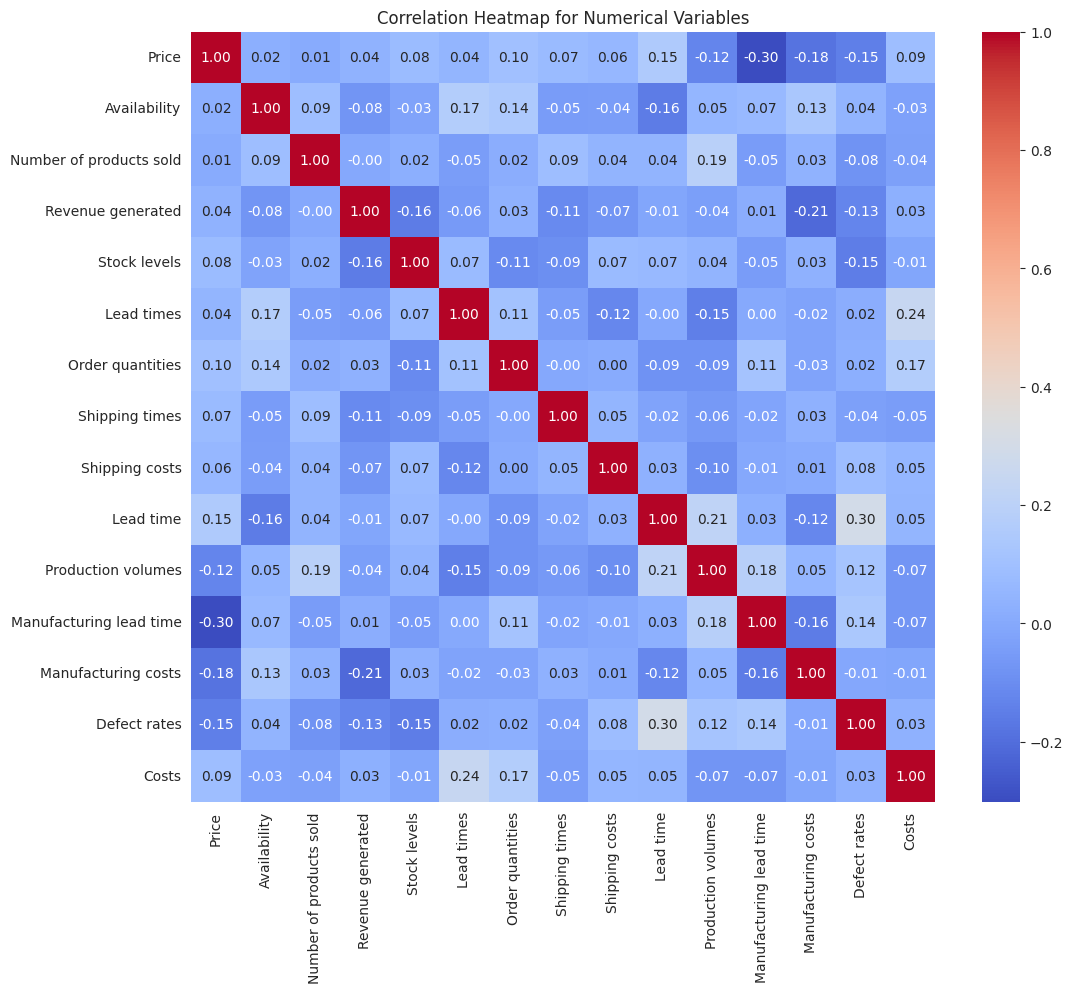

In [ ]:
# Select numerical columns (float and int)
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

- The heatmap displays Pearson’s R values, indicating the correlation between pairs of variables.
- Correlation values close to 0 suggest no linear relationship between the variables.
- In this dataset, there are no strong correlations between any pairs of variables, as most values are near 0.

These bi-variate analysis techniques provide valuable insights into the relationships between different features in the dataset, helping to understand how they interact and influence each other. Understanding these relationships is crucial for building more accurate models and making informed decisions in data analysis and machine learning tasks.

#Multivariate Analysis

Multivariate analysis involves examining more than two variables simultaneously to understand their relationships and combined effects. This type of analysis is essential for uncovering complex interactions in data. Let’s explore several multivariate analysis techniques.

#Countour Plot
A contour plot is a graphical technique that represents a 3-dimensional surface by plotting constant z slices, called contours, in a 2-dimensional format. This allows us to visualize complex relationships between three variables in an easily interpretable 2-D chart.

Here for example Examining the relationship between between the Price, Availability and number of products

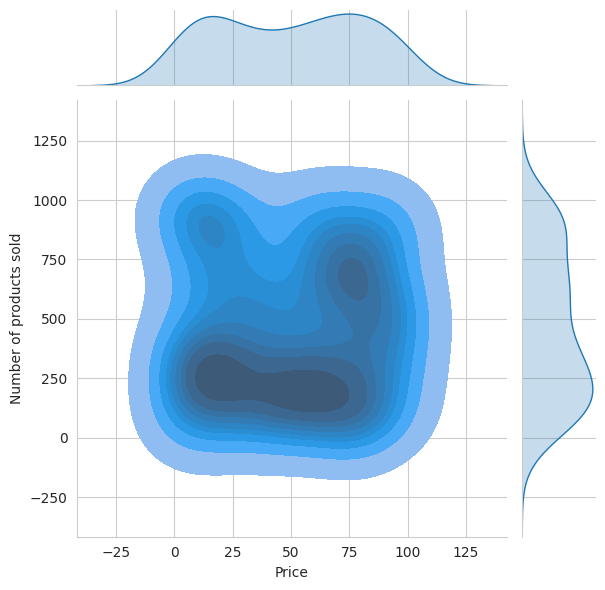

In [ ]:
sns.jointplot(x='Price', y='Number of products sold', data=data, kind='kde', fill=True)
plt.show()

Conclusion:
- From the above contour plot, it can be observed that the Price between the age 10-75  witnessed more volume product sold in the count of 125-300 products
- The contour lines represent the density of data points. Closer contour lines indicate a higher density of data points.
- The areas with the darkest shading represent the highest density of data.

#3D Scatter Plot
A 3D scatter plot is an extension of the traditional scatter plot into three dimensions, which allows us to visualize the relationship among three variables.

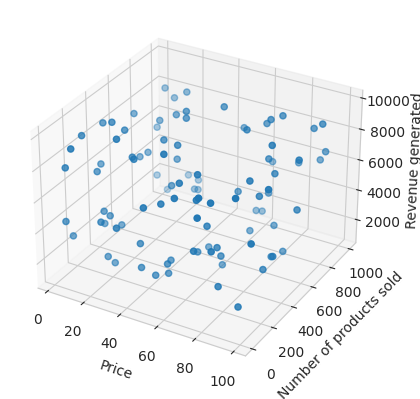

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Price'], data['Number of products sold'], data['Revenue generated'])
ax.set_xlabel('Price')
ax.set_ylabel('Number of products sold')
ax.set_zlabel('Revenue generated')

plt.show()

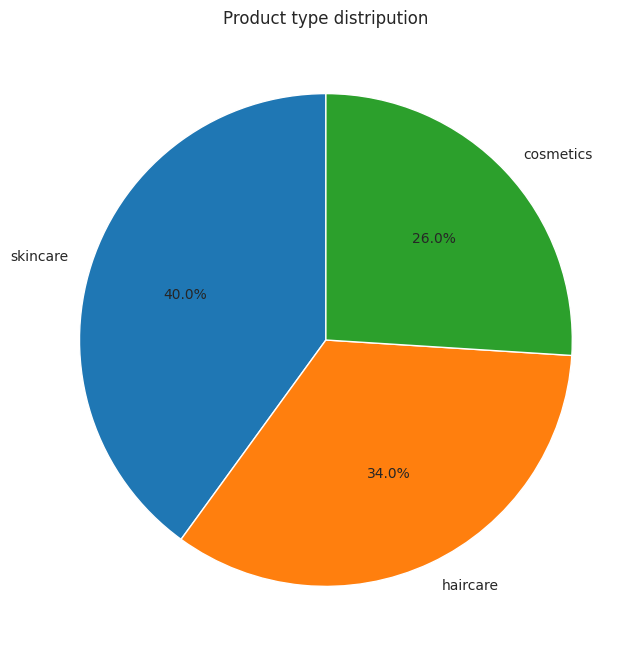

In [ ]:
#PI chart
# Assuming 'Customer demographics' contains relevant information
customer_demographics = data['Product type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(customer_demographics, labels=customer_demographics.index, autopct='%1.1f%%', startangle=90)
plt.title('Product type distripution')
plt.show()

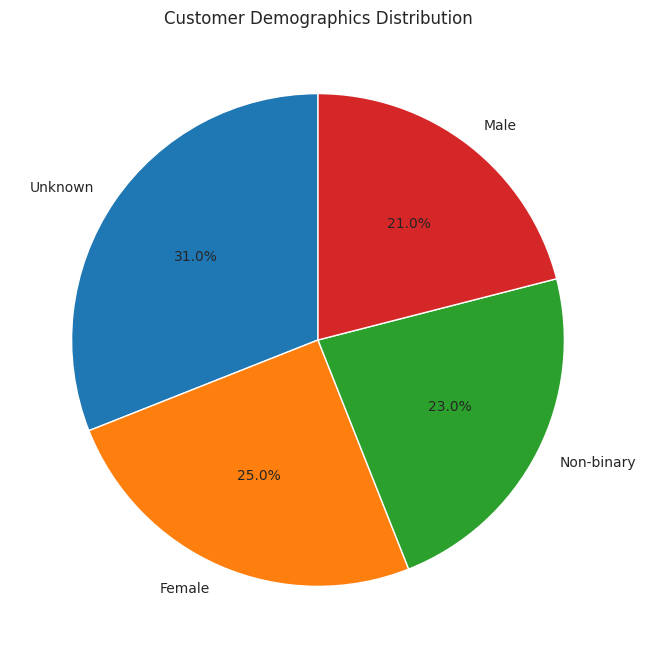

In [ ]:
# Assuming 'Customer demographics' contains relevant information
customer_demographics = data['Customer demographics'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(customer_demographics, labels=customer_demographics.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Demographics Distribution')
plt.show()

#Chi-square test
It is a statistical method used to examine the association between categorical variables. It helps determine whether there is a significant relationship between two categorical variables in a contingency table. Here's how you can perform a Chi-square test to evaluate the relationship between categorical data in Python:

Steps involved in Chi-Square Test:

1. Prepare the Data
- Organize your data into a contingency table
2. State the Hypotheses:
- Null Hypothesis (H0): There is no association between the variables (they are independent).
- Alternative Hypothesis (H1): There is an association between the variables (they are not independent).
3. Calculate the Chi-square Statistic:
- Use the formula to compute the Chi-square statistic and p-value.
4. Interpret the Results:
- Compare the p-value with a significance level (typically 0.05) to determine whether to reject the null hypothesis.


In [ ]:
#Group the product type PI chart based on customer demography
Customer_demographics_group = data.groupby(['Product type','Customer demographics']).size().unstack().fillna(0)
Customer_demographics_group

Customer demographics  Female  Male  Non-binary  Unknown
Product type                                            
cosmetics                  10     4           5        7
haircare                    2    10           7       15
skincare                   13     7          11        9

In [ ]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(Customer_demographics_group)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 13.082213806873492
P-value: 0.04174880460509854
Degrees of Freedom: 6
Expected Frequencies:
[[ 6.5   5.46  5.98  8.06]
 [ 8.5   7.14  7.82 10.54]
 [10.    8.4   9.2  12.4 ]]


- **Interpretation**
1.   Statistical Significance
     - The P-value (0.0417) is less than the common significance level of 0.05.
     - This indicates that there is a statistically significant association between the variables at the 5% significance level.
2.   Degrees of Freedom
     - The 6 degrees of freedom suggest that the data is distributed across a table with 3 rows and 4 columns.
3.   Chi-Square Statistic
     - The value of 13.082, combined with the degrees of freedom and the P-value, leads to the rejection of the null hypothesis.
4.   Conclusion:
     - Since the P-value is less than 0.05, we reject the null hypothesis.
     - This means that there is enough evidence to suggest that there is a significant association between the categorical variables in your dataset.


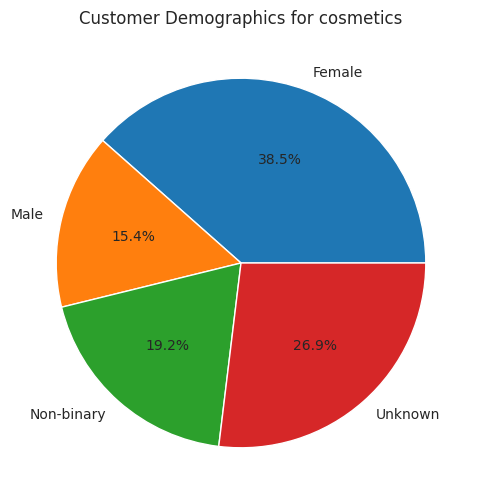

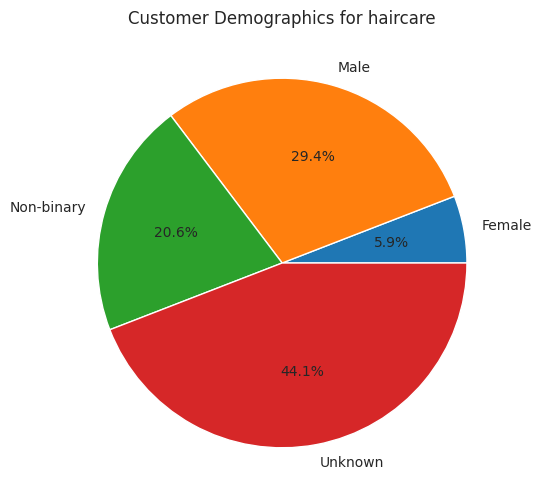

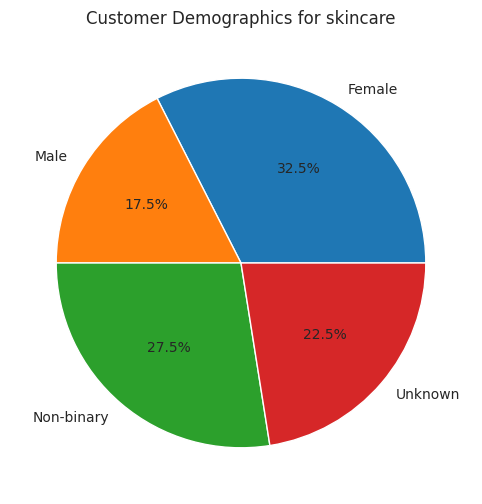

In [ ]:
# Group the data by 'Product type' and 'Customer demographics' and count occurrences
grouped_data = data.groupby(['Product type', 'Customer demographics'])['SKU'].count().reset_index(name='Count')

# Iterate over each product type and create a pie chart
for product_type in grouped_data['Product type'].unique():
    subset = grouped_data[grouped_data['Product type'] == product_type]
    plt.figure(figsize=(8, 6))
    plt.pie(subset['Count'], labels=subset['Customer demographics'], autopct='%1.1f%%')
    plt.title(f'Customer Demographics for {product_type}')
    plt.show()